# Тема проекта "Выявление закономерностей, определяющих успешность компьютерных игр"


# **Описание проекта**

*Заказчик исследования* .<br>
Вы работаете в интернет-магазине «Ачивка», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о продажах
игр, оценки пользователей и экспертов, жанры и платформы. Вам нужно выявить
определяющие успешность игры закономерности. Это позволит сделать ставку на
потенциально популярный продукт и спланировать рекламные кампании.


# Цели и задачи проекта

**Цели проекта:**<br>
получить практические навыки самостоятельной обработки и анализа данных, тренировки модели и прогнозирования<br><br>
**Задачи проекта:**<br>
- изучить датасет с продажами игр;<br>
- установить закономерности, определяющие успешность игры;<br>
- оценить успешность продаж в завсисимости от года жанра, платформы;
- обучить простейшую модель для задач регрессии.

# **Содержание проекта**

**1. Загрузка файла с данными и изучение общей информации**<br>
<a id='загрузка_файла'></a>
[Шаг 1. Загрузка файла](#загрузка_файла_задание)<br>

**2. Предобработка данных**<br>
<a id='предобработка_данных'></a>
[Шаг 2. Предобработка данных](#предобработка_данных_задание)<br>

<a id='2.1'></a>
[2.1. Переименование столбца, изменение логики порядка столбцов в датафрейме](#2.1_задание)<br>
<a id='2.2'></a>
[2.2. Проверка на редкие и выбивающиеся значения](#2.2_задание)<br>
<a id='2.3'></a>
[2.3. Проверка типов данных](#2.3_задание)<br>
<a id='2.4'></a>
[2.4. Изучение пропусков в датафрейме](#2.4_задание)<br>
<a id='2.5'></a>
[2.5. Изучение дубликатов в датафрейме](#2.5_задание)<br>
<a id='2.6'></a>
[2.6. Изучение категориальных значений](#2.6_задание)<br>
<a id='2.7'></a>
[2.7. Проверка количественных значений](#2.7_задание)<br>
<a id='2.8'></a>
[2.8. Добавление новых столбцов](#2.8_задание)<br>

**3. Исследовательский анализ данных**<br>
<a id='исследовательский_анализ'></a>
[Шаг 3. Исследовательский анализ](#исследовательский_анализ_задание)<br>

**4. Графический анализ данных**<br>
<a id='Графический анализ данных'></a>
[Шаг 4. Графический анализ данных](#графический_анализ_данных_задание)<br>

[4.1. Закономерности в данных](#4.1_задание)<br>
[4.2. Портрет пользователя](#4.2_задание)<br>
[4.3. Построение и обучение простейшей модели для задачи регрессии](#4.3_задание)<br>

**5. Общий вывод по проекту**<br>
<a id='общий_вывод'></a>
[Шаг 5. Общий вывод](#общий_вывод_задание)

***

Шпаргалка по анализу данных в Pandas:<br>
https://blog.skillfactory.ru/kak-nachat-analizirovat-dannye-v-pandas-pervye-shagi/ <br>
https://habr.com/ru/companies/ruvds/articles/494720/

***

# 1. Загрузка файла с данными и изучение общей информации
<a id='загрузка_файла_задание'></a>
[К содержанию](#загрузка_файла)

**1.1.** Импорт библиотек.

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import numpy as np
import sklearn
import tqdm
import time

import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import(
    mean_squared_error,
    r2_score
)

Сброс ограничений на количество выводимых столбцов.

In [ ]:
pd.set_option('display.max_columns', None)

Установка единообразного отображения вещественных чисел с двумя знаками после запятой.

In [ ]:
pd.set_option('display.float_format', '{:,.2f}'.format)

**1.2.** Загрузка файла с данными.

In [ ]:
data = pd.read_csv('22_games.csv')

**1.3.** Изучение общей информации о датафрейме, структуры данных.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16621 entries, 0 to 16620
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16619 non-null  object 
 1   Platform         16621 non-null  object 
 2   Year_of_Release  16352 non-null  float64
 3   Genre            16619 non-null  object 
 4   NA_sales         16621 non-null  float64
 5   EU_sales         16621 non-null  float64
 6   JP_sales         16621 non-null  float64
 7   Other_sales      16621 non-null  float64
 8   Critic_Score     8122 non-null   float64
 9   User_Score       9984 non-null   object 
 10  Rating           9921 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**1.4.** Знакомство с данными, вывод первых десяти строк датафрейма.

In [ ]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**1.5.** Знакомство с данными, вывод последних десяти строк датафрейма.

In [ ]:
data.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16611,Palais de Reine,PS2,"2,007.00",Strategy,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16612,Bakumatsu Rock: Ultra Soul,PSP,"2,014.00",Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16613,Dragon Ball Z for Kinect,X360,"2,012.00",Fighting,0.01,0.00,0.00,0.00,49.00,2.1,T
16614,Legacy of Kain: Defiance,PC,"2,003.00",Action,0.00,0.01,0.00,0.00,70.00,8.7,M
16615,Balloon Pop 2,3DS,"2,012.00",Puzzle,0.01,0.00,0.00,0.00,NaN,tbd,E
16616,National Geographic Panda (JP sales),DS,"2,008.00",Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16617,Codename: Panzers Complete Collection,PC,"2,016.00",Strategy,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16618,Xblaze: Lost Memories,PSV,"2,015.00",Adventure,0.01,0.00,0.00,0.00,NaN,7,M
16619,Knights in the Nightmare: DHE Series Special Pack,DS,"2,008.00",Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16620,Trine,PC,"2,009.00",Action,0.00,0.01,0.00,0.00,80.00,8.2,E10+


**1.6.** Знакомство с данными, вывод случайной выборки из датафрейма.

In [ ]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7872,50 Cent: Blood on the Sand,PS3,"2,009.00",Shooter,0.10,0.06,0.01,0.03,72.00,7.2,M
5369,Marvel Super Heroes,PS,"1,997.00",Fighting,0.19,0.13,0.00,0.02,NaN,NaN,NaN
10796,Dora's Cooking Club,DS,"2,010.00",Misc,0.08,0.01,0.00,0.01,NaN,NaN,NaN
13147,Hail to the Chimp,PS3,"2,008.00",Misc,0.05,0.00,0.00,0.00,51.00,4.5,T
2807,NHL 11,X360,"2,010.00",Sports,0.61,0.07,0.00,0.05,88.00,7.7,E10+
2778,LEGO Marvel Super Heroes,WiiU,"2,013.00",Action,0.31,0.35,0.02,0.06,82.00,8,E10+
2294,Marvel: Ultimate Alliance 2,X360,"2,009.00",Role-Playing,0.68,0.15,0.00,0.08,73.00,7.3,T
5236,South Park Rally,PS,"1,998.00",Racing,0.20,0.13,0.00,0.02,NaN,NaN,NaN
5834,NASCAR 2011: The Game,X360,"2,011.00",Racing,0.29,0.00,0.00,0.02,62.00,4.1,E
4509,Mass Effect Trilogy,PS3,"2,012.00",Action,0.37,0.00,0.00,0.06,NaN,8.7,M


**1.7.** Знакомство с атрибутами датафрейма.

In [ ]:
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [ ]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

> **Предварительный вывод по данным**

Согласно документации к данным:

1. Name – название игры;<br>
2. Platform – платформа;<br>
3. Year_of_Release – год выпуска;<br>
4. Genre – жанр игры;<br>
5. NA_sales – продажи в Северной Америке (миллионы долларов);<br>
6. EU_sales – продажи в Европе (миллионы долларов);<br>
7. JP_sales – продажи в Японии (миллионы долларов);<br>
8. Other_sales – продажи в других странах (миллионы долларов);
<br>
9. Critic_Score – оценка критиков (максимум 100);
<br>
10. User_Score – оценка пользователей (максимум 10);<br>
11. Rating – рейтинг от организации ESRB (англ. Entertainment Software Rating
Board);<br>
ESRB - ассоциация определяет рейтинг компьютерных игр и присваивает им
подходящую возрастную категорию.

Выводы<br>
1. В датафрейме **16621 запись, 11 столбцов**; <br>
2. В столбцах 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating' имеются **пропущенные значения**; <br>
3. Нарушение стиля в заголовках столбцов **'Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'**;<br>
4. Столбец 'Year_of_Release' следует привести к типу **int**, поскольку важен только год выхода игры; 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales' следует привести к **int** (измеряется в миллионах долларов, т.о. будет не критичная потеря данных); 'User_Score' следут привести к **float64**;<br>
5. Во всех столбцах возможны дубликаты.<br>

# 2. Предобработка данных
<a id='предобработка_данных_задание'></a>
[К содержанию](#предобработка_данных)

#### Шаг 2.1. Переименование столбцов, изменение логики порядка столбцов в датафрейме
<a id='2.1_задание'></a>
[К содержанию](#2.1)

Убедитесь, что в заголовках столбцов нет лишних пробелов, нарушения "змеиного регистра".

In [ ]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Выполните предобработку данных в датафрейме - приведение строчных значений к одному (нижнему) регистру.

In [ ]:
data.columns = data.columns.str.lower()
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E


In [ ]:
columns_to_replace = [
    'name',
    'platform',
    'genre',
    'rating'
    ]

In [ ]:
for column in columns_to_replace:
  data[column] = data[column].str.lower()


In [ ]:
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3974,"transformers: war for cybertron (xbox 360, ps3...",ps3,"2,010.00",shooter,0.24,0.18,0.00,0.08,NaN,NaN,NaN
14760,mystery trackers: the void,pc,"2,011.00",puzzle,0.00,0.02,0.00,0.00,NaN,tbd,NaN
6928,pictionary: ultimate edition,ps3,"2,011.00",misc,0.15,0.06,0.00,0.03,62.00,tbd,e
15867,shinseiki gpx cyber formula: road to the infin...,ps2,"2,007.00",racing,0.00,0.00,0.02,0.00,NaN,NaN,NaN
9646,monster truck madness,gba,"2,003.00",racing,0.09,0.03,0.00,0.00,75.00,tbd,e
5309,destiny: the taken king,x360,"2,015.00",shooter,0.24,0.08,0.00,0.03,NaN,4.4,t
15403,hakuoki: shinkai - hana no shou,psv,"2,016.00",adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
15846,zero no tsukaima: muma ga tsumugu yokaze no no...,ps2,"2,007.00",adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
75,the elder scrolls v: skyrim,x360,"2,011.00",role-playing,5.05,2.79,0.10,0.85,96.00,8.4,m
11239,savage skies,ps2,"2,002.00",shooter,0.04,0.03,0.00,0.01,56.00,tbd,m


***

#### Шаг 2.2. Проверка на редкие и выбивающиеся значения
<a id='2.2_задание'></a>
[К содержанию](#2.2)

Используя методы unique(), value_counts(), функцию sort_values() попробуйте выявить в датасете редкие и выбивающиеся значения. Предположите, почему эти значение могли появиться.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16621 entries, 0 to 16620
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16619 non-null  object 
 1   platform         16621 non-null  object 
 2   year_of_release  16352 non-null  float64
 3   genre            16619 non-null  object 
 4   na_sales         16621 non-null  float64
 5   eu_sales         16621 non-null  float64
 6   jp_sales         16621 non-null  float64
 7   other_sales      16621 non-null  float64
 8   critic_score     8122 non-null   float64
 9   user_score       9984 non-null   object 
 10  rating           9921 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Проверим столбец **'rating'**



In [ ]:
games_rating = data['rating'].unique()
games_rating

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

In [ ]:
dublikat_rating = data['rating'].value_counts()
dublikat_rating

e       3978
t       2954
m       1559
e10+    1416
ec         8
rp         3
k-a        2
ao         1
Name: rating, dtype: int64

In [ ]:
dublikat1 = data['rating'].sort_values()
dublikat1

875       ao
0          e
4307       e
9875       e
9874       e
        ... 
16611    NaN
16612    NaN
16616    NaN
16617    NaN
16619    NaN
Name: rating, Length: 16621, dtype: object

In [ ]:
data['rating'] = data['rating'].str.replace('k-a', 'e', regex=True)

Проверим столбец **'platform'**

In [ ]:
games_platform = data['platform'].unique()
games_platform

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [ ]:
dublikat_platform = data['platform'].value_counts()
dublikat_platform

ps2     2154
ds      2141
ps3     1324
wii     1316
x360    1258
psp     1200
ps      1195
pc       958
xb       824
gba      815
gc       554
3ds      515
psv      417
ps4      392
n64      317
xone     242
snes     239
sat      173
wiiu     146
2600     133
nes       98
gb        98
dc        52
gen       29
ng        12
scd        6
ws         6
3do        3
tg16       2
gg         1
pcfx       1
Name: platform, dtype: int64

In [ ]:
dublikat_platform1 = data['platform'].sort_values()
dublikat_platform1

3021     2600
4172     2600
6299     2600
5233     2600
1555     2600
         ... 
1615     xone
16035    xone
6891     xone
6787     xone
342      xone
Name: platform, Length: 16621, dtype: object

Проверим столбец **'genre'**

In [ ]:
games_genre = data['genre'].unique()
games_genre

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

In [ ]:
dublikat_genre = data['genre'].value_counts()
dublikat_genre

action          3343
sports          2337
misc            1745
role-playing    1493
shooter         1321
adventure       1283
racing          1243
platform         886
simulation       869
fighting         847
strategy         679
puzzle           573
Name: genre, dtype: int64

In [ ]:
dublikat_genre1 = data['genre'].sort_values()
dublikat_genre1

16620      action
2904       action
9151       action
9149       action
2909       action
           ...   
15976    strategy
15939    strategy
9771     strategy
659           NaN
14244         NaN
Name: genre, Length: 16621, dtype: object

Проверим столбец **'critic_score'**

In [ ]:
games_critic_score = data['critic_score'].unique()
games_critic_score

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [ ]:
dublikat_critic_score = data['critic_score'].value_counts()
dublikat_critic_score

70.00    256
71.00    254
75.00    245
78.00    240
73.00    238
        ... 
20.00      3
21.00      1
17.00      1
22.00      1
13.00      1
Name: critic_score, Length: 82, dtype: int64

Проверим столбец **'user_score'**


In [ ]:
games_user_score = data['user_score'].unique()
games_user_score

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
dublikat_user_score = data['user_score'].value_counts()
dublikat_user_score

tbd    2410
7.8     324
8       289
8.2     281
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [ ]:
dublikat_user_score1 = data['user_score'].sort_values()
dublikat_user_score1

2835       0
9970     0.2
13682    0.2
13380    0.3
5764     0.3
        ... 
16611    NaN
16612    NaN
16616    NaN
16617    NaN
16619    NaN
Name: user_score, Length: 16621, dtype: object

> **Предварительный вывод по шагу 2.2**

- В столбце **'rating'** значение ao (adults only 18+) встречается единожды, возможно, из-за низкого спроса на такие игры; <br>
- В столбце **'rating'** значение k-a (для детей и взрослых) втречается дважды, считается устаревшим обозначением и заменено рейтингом e;<br>
- В столбце **'rating'** значение rp встречается трижды, связано это с тем, что мало игры, которым еще не присвоили возрастной рейтинг;<br>
- В столбце **'rating'** значение ec(подходит для детей от 3 лет, неприемлемое содержание отсутствует) встречается 8 раз, скорее всего связано с низким спросом;<br>
- В столбце **'platform'** редкие значения это малоизвестные игровые платформы;
- В столбце **'genre'** нет выбивающихся значений;
- В столбце **'critic_score'** редкие значения являются редкими оценками критиков, нет значений превыщающих 100;
- В столбце **'user_score'** встречается значение 'tbd' - используется, если какая-то информация еще не определена или решение по вопросу не принято. Нет значений превыщающих 10;

***

#### Шаг 2.3. Проверка типов данных
<a id='2.3_задание'></a>
[К содержанию](#2.3)

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16621 entries, 0 to 16620
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16619 non-null  object 
 1   platform         16621 non-null  object 
 2   year_of_release  16352 non-null  float64
 3   genre            16619 non-null  object 
 4   na_sales         16621 non-null  float64
 5   eu_sales         16621 non-null  float64
 6   jp_sales         16621 non-null  float64
 7   other_sales      16621 non-null  float64
 8   critic_score     8122 non-null   float64
 9   user_score       9984 non-null   object 
 10  rating           9921 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data['year_of_release'] = data['year_of_release'].fillna(0)

In [ ]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [ ]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

> **Предварительный вывод по шагу 2.3**

В шаге 2.3, а также 2.2 проекта были выполнены следующие действия:
- Столбец **'year_of_release'** приведен к типу **int**
- По итогу проверки в пункте 2.2 в столбце **'user_score'** имеются значения 'tbd', которые позже будут заменены на -1
***

#### Шаг 2.4. Изучение пропусков в датафрейме
<a id='2.4_задание'></a>
[К содержанию](#2.4)

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

**a)** Анализ количества **пропусков** в столбцах.

In [ ]:
data.isnull().sum(axis=0).sort_values(ascending=False)

user_score         9047
critic_score       8499
rating             6700
name                  2
genre                 2
platform              0
year_of_release       0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

**b)** Расчет **количества пропущенных значений** в каждом столбце, **в процентах**.

In [ ]:
data.isnull().sum(axis=0).sort_values(ascending=False) / data.shape[0] * 100

user_score        54.43
critic_score      51.13
rating            40.31
name               0.01
genre              0.01
platform           0.00
year_of_release    0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
dtype: float64

> **Предварительный вывод**

- В 6 столбцах нет пропущенных значений<br>
- В столбцах **'critic_score', 'rating', 'user_score'** имеется 51.13%, 40.31%, 39.93% пропусков соответственно. Для столбцов **'critic_score', 'user_score'**
 заменим пустые значения на '-1', для столбца **'rating'** на 'nd', что будет означать, что данных нет<br>
- В столбцах **'name', 'genre'** по 2 пропуска, они требуют уточнения<br>


Проработайте каждый столбец по отдельности.

Функция для подсчета количества пропущенных значения в столбце и вывода его на экран.

In [ ]:
def missing_values(col):
    return print (
        'Количество пропущенных значений: {} ({}%)'.format(
            data[col].isnull().sum(), round(data[col].isnull().sum() / data.shape[0] * 100, 2))
    )

**c)** Столбец **'critic_score'**.

In [ ]:
missing_values('critic_score')

Количество пропущенных значений: 8499 (51.13%)


In [ ]:
data[data['critic_score'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16615,balloon pop 2,3ds,2012,puzzle,0.01,0.00,0.00,0.00,NaN,NaN,e
16616,national geographic panda (jp sales),ds,2008,simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16617,codename: panzers complete collection,pc,2016,strategy,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16618,xblaze: lost memories,psv,2015,adventure,0.01,0.00,0.00,0.00,NaN,7.00,m


Заменим NaN на -1

In [ ]:
data['critic_score'] = data['critic_score'].fillna(-1)

Проверим пропуски после изменения значений

In [ ]:
missing_values('critic_score')

Количество пропущенных значений: 0 (0.0%)


**d)** Столбец **'user_score'**

In [ ]:
missing_values('user_score')

Количество пропущенных значений: 9047 (54.43%)


In [ ]:
data[data['user_score'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.00,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1.00,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,-1.00,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,-1.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16612,bakumatsu rock: ultra soul,psp,2014,misc,0.00,0.00,0.01,0.00,-1.00,NaN,NaN
16615,balloon pop 2,3ds,2012,puzzle,0.01,0.00,0.00,0.00,-1.00,NaN,e
16616,national geographic panda (jp sales),ds,2008,simulation,0.00,0.00,0.01,0.00,-1.00,NaN,NaN
16617,codename: panzers complete collection,pc,2016,strategy,0.00,0.01,0.00,0.00,-1.00,NaN,NaN


Заменим NaN на -1

In [ ]:
data['user_score'] = data['user_score'].fillna(-1)

Проверим пропуски после изменения значений

In [ ]:
missing_values('user_score')

Количество пропущенных значений: 0 (0.0%)


**e)** Столбец **'rating'**

In [ ]:
missing_values('rating')

Количество пропущенных значений: 6700 (40.31%)


In [ ]:
data[data['rating'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.00,-1.00,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1.00,-1.00,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,-1.00,-1.00,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,-1.00,-1.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16611,palais de reine,ps2,2007,strategy,0.00,0.00,0.01,0.00,-1.00,-1.00,NaN
16612,bakumatsu rock: ultra soul,psp,2014,misc,0.00,0.00,0.01,0.00,-1.00,-1.00,NaN
16616,national geographic panda (jp sales),ds,2008,simulation,0.00,0.00,0.01,0.00,-1.00,-1.00,NaN
16617,codename: panzers complete collection,pc,2016,strategy,0.00,0.01,0.00,0.00,-1.00,-1.00,NaN


Заменим NaN на nd

In [ ]:
data['rating'] = data['rating'].fillna('nd')

Проверим пропуски после изменения значений

In [ ]:
missing_values('rating')

Количество пропущенных значений: 0 (0.0%)


**f)** Столбцы **'name'** и **'genre'**

In [ ]:
data[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,-1.00,-1.00,nd
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,-1.00,-1.00,nd


Нет возможности восстановаить эти два значения, поэтому удалим их

In [ ]:
data.drop(labels=[659], axis = 0, inplace= True)

In [ ]:
data.drop(labels=[14244], axis = 0, inplace= True)

In [ ]:
data = data.reset_index(drop=True)

> **Предварительный вывод по шагу 2.4**

- В столбцах **'critic_score', 'user_score'** вместо NaN подставлены значения **'-1'**, чтобы не присвоить слишком низкий рейтинг возможно новым играм<br>
- В столбце **'rating'** NaN заменены на **'nd'** для того чтобы не ошибится с рейтингом игр<br>
- NaN в столбцах **'name'** и **'genre'** принадлежали одним и тем же строкам, они были удалены из-за невозможности восстановления информации<br>
- Индексы после удаления строк были перезаписаны<br>

***

#### Шаг 2.5. Изучение дубликатов в датафрейме
<a id='2.5_задание'></a>
[К содержанию](#2.5)
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

**a)** Поиск **явных дубликатов**.

In [ ]:
print('Явных дубликатов : ', data.duplicated().sum())

Явных дубликатов :  0


**b)** Проверка наличия **пустых**/почти пустых **строк**.

In [ ]:
print('Пустых строк : ', data.isnull().sum(axis=1).max())

Пустых строк :  0


**c)** Поиск **неявных дубликатов** (по столбцам).

Неявные дубликаты возможны в столбцах **'name', 'platform', 'genre', 'rating'**.Проверим данные столбцы.

1) Столбец **'name'**

In [ ]:
data['name'].sort_values().unique()

array(['.hack//g.u. vol.1//rebirth', '.hack//g.u. vol.2//reminisce',
       '.hack//g.u. vol.2//reminisce (jp sales)', ..., 'zwei!!',
       'zyuden sentai kyoryuger: game de gaburincho!!',
       '¡shin chan flipa en colores!'], dtype=object)

In [ ]:
data['name'] = data['name'].str.strip()

In [ ]:
data['name'] = data['name'].str.lstrip(' !¡')

In [ ]:
data['name'] = data['name'].str.rstrip(' !¡')

In [ ]:
data['name'].sort_values().unique()

array(['.hack//g.u. vol.1//rebirth', '.hack//g.u. vol.2//reminisce',
       '.hack//g.u. vol.2//reminisce (jp sales)', ...,
       'zumba fitness: world party', 'zwei',
       'zyuden sentai kyoryuger: game de gaburincho'], dtype=object)

2) Столбец **'platform'**

In [ ]:
data['platform'].sort_values().unique()

array(['2600', '3do', '3ds', 'dc', 'ds', 'gb', 'gba', 'gc', 'gen', 'gg',
       'n64', 'nes', 'ng', 'pc', 'pcfx', 'ps', 'ps2', 'ps3', 'ps4', 'psp',
       'psv', 'sat', 'scd', 'snes', 'tg16', 'wii', 'wiiu', 'ws', 'x360',
       'xb', 'xone'], dtype=object)

3) Столбец **'genre'**

In [ ]:
data['genre'].sort_values().unique()

array(['action', 'adventure', 'fighting', 'misc', 'platform', 'puzzle',
       'racing', 'role-playing', 'shooter', 'simulation', 'sports',
       'strategy'], dtype=object)

4) Столбец **'rating'**

In [ ]:
data['rating'].sort_values().unique()

array(['ao', 'e', 'e10+', 'ec', 'm', 'nd', 'rp', 't'], dtype=object)

> **Предварительный вывод по шагу 2.5**

- Нет явных дубликатов<br>
- Нет пустых значений<br>
- В столбце **'name'** были удалены лишние значения<br>

***

#### Шаг 2.6. Изучение категориальных значений
<a id='2.6_задание'></a>
[К содержанию](#2.6)
- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16619 entries, 0 to 16618
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16619 non-null  object 
 1   platform         16619 non-null  object 
 2   year_of_release  16619 non-null  int64  
 3   genre            16619 non-null  object 
 4   na_sales         16619 non-null  float64
 5   eu_sales         16619 non-null  float64
 6   jp_sales         16619 non-null  float64
 7   other_sales      16619 non-null  float64
 8   critic_score     16619 non-null  float64
 9   user_score       16619 non-null  float64
 10  rating           16619 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Данные в категориальных столбцах **'name', 'platform', 'genre', 'rating'** были проверены в пункте 2.5

> **Предварительный вывод по шагу 2.6**

- В столбце 'name' были обнаружены лишние символы в названиях, они были удалены <br>
- В столбцах 'platform', 'genre', 'rating' не были обнаружены подозрительные значения <br>


***

#### Шаг 2.7. Проверка количественных значений
<a id='2.7_задание'></a>
[К содержанию](#2.7)

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

Составьте список столбцов с количественными значениями.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16619 entries, 0 to 16618
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16619 non-null  object 
 1   platform         16619 non-null  object 
 2   year_of_release  16619 non-null  int64  
 3   genre            16619 non-null  object 
 4   na_sales         16619 non-null  float64
 5   eu_sales         16619 non-null  float64
 6   jp_sales         16619 non-null  float64
 7   other_sales      16619 non-null  float64
 8   critic_score     16619 non-null  float64
 9   user_score       16619 non-null  float64
 10  rating           16619 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Столбцы с количественными значениями: year_of_release, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score

Столбцы year_of_release, critic_score, user_score были проверены в пунктах 2.3, 2.4.

Подозрительными значениями в столбцах продаж будут отрицательные числа. Проверим есть ли они

In [ ]:
filtr = data[data['na_sales'] < 0]
filtr

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [ ]:
filtr = data[data['eu_sales'] < 0]
filtr

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [ ]:
filtr = data[data['jp_sales'] < 0]
filtr

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [ ]:
filtr = data[data['other_sales'] < 0]
filtr

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Статистический анализ данных**

1. Проанализируйте статистические показатели (описательные статистики) для
числовых переменных датафрейма. Сделайте выводы.

In [ ]:
data_for_statistic = data

In [ ]:
data_for_statistic.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,"16,619.00","16,619.00","16,619.00","16,619.00","16,619.00","16,619.00","16,619.00"
mean,"1,973.99",0.26,0.15,0.08,0.05,33.20,2.70
std,253.27,0.82,0.50,0.31,0.19,36.31,4.17
min,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00
25%,"2,003.00",0.00,0.00,0.00,0.00,-1.00,-1.00
50%,"2,007.00",0.08,0.02,0.00,0.01,-1.00,-1.00
75%,"2,010.00",0.24,0.11,0.04,0.03,70.00,7.30
max,"2,016.00",41.36,28.96,10.22,10.57,98.00,9.70


In [ ]:
data_for_statistic.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,"16,619.00","1,973.99",253.27,0.00,"2,003.00","2,007.00","2,010.00","2,016.00"
na_sales,"16,619.00",0.26,0.82,0.00,0.00,0.08,0.24,41.36
eu_sales,"16,619.00",0.15,0.50,0.00,0.00,0.02,0.11,28.96
jp_sales,"16,619.00",0.08,0.31,0.00,0.00,0.00,0.04,10.22
other_sales,"16,619.00",0.05,0.19,0.00,0.00,0.01,0.03,10.57
critic_score,"16,619.00",33.20,36.31,-1.00,-1.00,-1.00,70.00,98.00
user_score,"16,619.00",2.70,4.17,-1.00,-1.00,-1.00,7.30,9.70


In [ ]:
data_for_statistic.shape[0]

16619

**Вывод**

Количество элементов в выборке 16619

**Анализ минимального значения выборки**

In [ ]:
data_for_statistic['critic_score'].min()

-1.0

**Вывод**

Минимальная оценка игры критиками за все время -1

**Анализ максимального значения выборки**

In [ ]:
data_for_statistic['critic_score'].max()

98.0

**Вывод**

Максимальная оценка игры критиками за все время 98

**Анализ среднего значения**

In [ ]:
data_for_statistic['critic_score'].mean()

33.197665322823276

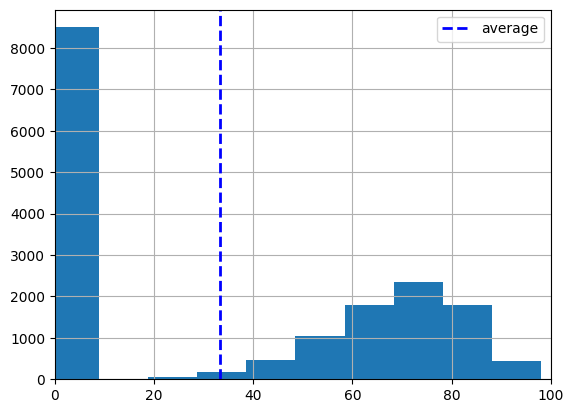

In [ ]:
fig, ax = plt.subplots()

data_for_statistic['critic_score'].hist()
avg = data_for_statistic['critic_score'].mean()

ax.set_xlim([0, 100])

ax.axvline(x=avg, color='b', label='average', linestyle='--', linewidth=2)

ax.legend().set_visible(True)

**Вывод**
- Среднее значение - 33.197665322823276
- Минимальная оценка игры критиками за все время -1
- Максимальная оценка игры критиками за все время 98
- Максимальные и минимальные значения неравноудалены от среднего, это вызвано тем, что у мнгогих игр нет данных об оценке

In [ ]:
data_for_statistic['critic_score'].median()

-1.0

In [ ]:
data_for_statistic['critic_score'].value_counts()

-1.00    8497
70.00     256
71.00     254
75.00     245
78.00     240
         ... 
20.00       3
21.00       1
17.00       1
22.00       1
13.00       1
Name: critic_score, Length: 83, dtype: int64

**Вывод**<br>
В данном случае
медианное значение -1 неинформативно, поскольку всего лишь означает, что у большинства игр нет информации об оценке критиками.

2. Выполните сравнение описательных статистик двух выборок: пользовательских
оценок и оценок критиков. Приведите графики. Сделайте выводы. (Примечание: при
сравнении разделите оценки критиков на 10).

Для корректного сравнения приведем оценки критикам к диапазону от 0 до 10

In [ ]:
def fix_critic_score(critic_score):
    if critic_score > 10:
        return critic_score / 10
    return critic_score

data_for_statistic['critic_score'] = data_for_statistic['critic_score'].apply(fix_critic_score)

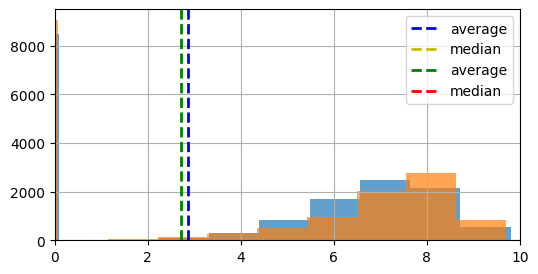

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))

data_for_statistic['critic_score'].hist(alpha=0.7)
avg_critic_score = data_for_statistic['critic_score'].mean()
median_critic_score = data_for_statistic['critic_score'].median()

data_for_statistic['user_score'].hist(alpha=0.7)
avg_user_score = data_for_statistic['user_score'].mean()
median_user_score = data_for_statistic['user_score'].median()

ax.set_xlim([0, 10])

ax.axvline(x=avg_critic_score, color='b', label='average', linestyle='--', linewidth=2)
ax.axvline(x=median_critic_score, color='y', label='median', linestyle='--', linewidth=2)

ax.axvline(x=avg_user_score, color='g', label='average', linestyle='--', linewidth=2)
ax.axvline(x=median_user_score, color='r', label='median', linestyle='--', linewidth=2)

ax.legend().set_visible(True)

- 'critic_score' - среднее правее медианы, распределение скошено вправо
- 'user_score' - среднее правее медианы, распределение скошено вправо

In [ ]:
data_for_statistic['critic_score'].quantile(0.25)

-1.0

In [ ]:
data_for_statistic['critic_score'].quantile(0.75)

7.0

**Вывод**<br>
- 0.25-квантиль = -1, а значит в нижней части оценок часто вречается отсутствие данных
- 0.75-квантиль = 7, следовательно, такую оценку ставят довольные критики

3. Рассчитайте и сравните разброс в пользовательских оценках и оценках критиков
для любого выбранного жанра (найдите межквартильный размах). Сделайте выводы.

**Межквартильный размах**

In [ ]:
data_for_statistic1 = data_for_statistic[data_for_statistic['genre'] == "action"]

In [ ]:
data_for_statistic1['critic_score'].quantile(0.75) - data_for_statistic1['critic_score'].quantile(0.25)

8.0

IQR = 8.0

*Нижняя граница выбросов*

In [ ]:
data_for_statistic1['critic_score'].quantile(0.25) - 1.5*8

-13.0

*Верхняя граница выбросов*

In [ ]:
data_for_statistic1['critic_score'].quantile(0.75) + 1.5*8

19.0

Найдем выбросы

In [ ]:
data_for_statistic1[data_for_statistic1['critic_score'] < -13]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [ ]:
data_for_statistic1[data_for_statistic1['critic_score'] > 19]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [ ]:
data_for_statistic1['user_score'].quantile(0.75) - data_for_statistic1['user_score'].quantile(0.25)

8.5

IQR = 8.5

*Нижняя граница выбросов*

In [ ]:
data_for_statistic1['user_score'].quantile(0.25) - 1.5*8.5

-13.75

*Верхняя граница выбросов*

In [ ]:
data_for_statistic1['user_score'].quantile(0.75) + 1.5*8.5

20.25

Найдем выбросы

In [ ]:
data_for_statistic1[data_for_statistic1['user_score'] < -13.75]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [ ]:
data_for_statistic1[data_for_statistic1['user_score'] > 20.25]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


*Есть выбросы ниже нижней границы, отсеем их*

**Вывод**<br>
 Выбросов нет

**Предварительный вывод по шагу 2.7**

- Подозрительные данные в столбцах 'year_of_release', 'critic_score', 'user_score' были проверены и исправлены либо объяснены в пунктах 2.3 и 2.4<br>
- Подозрительные данные в столбцах 'na_sales', 'eu_sales', 'jp_sales', 'other_sales' не обнаружены
- По межквартильному разбросу не были обнаружены выбросы из столбцов 'critic_score' и 'user_score'

4. Постройте гистограммы частот и «ящики с усами» для числовых переменных
датафрейма. Проанализируйте и сделайте выводы по выбросам для каждого признака (для
каждого столбца).

In [ ]:
stat = data.select_dtypes(exclude=['object', 'bool'])

In [ ]:
def plots(data, data_label, n_bins):

    a, axes = plt.subplots(1, 2, figsize=(16,4))

    axes[0].set_title('частота распределения', fontsize=14)
    axes[0].set_ylabel('частота', fontsize=14)
    axes[0].set_xlabel(data_label, fontsize=14)

    data.hist(bins=n_bins, ax=axes[0], edgecolor='black', linewidth=1)

    axes[1].set_title('boxplot', fontsize=14)
    axes[1].set_xlabel(data_label, fontsize=14)

    sns.boxplot(data=stat, x=data_label, ax=axes[1], linewidth=1)

    plt.show()

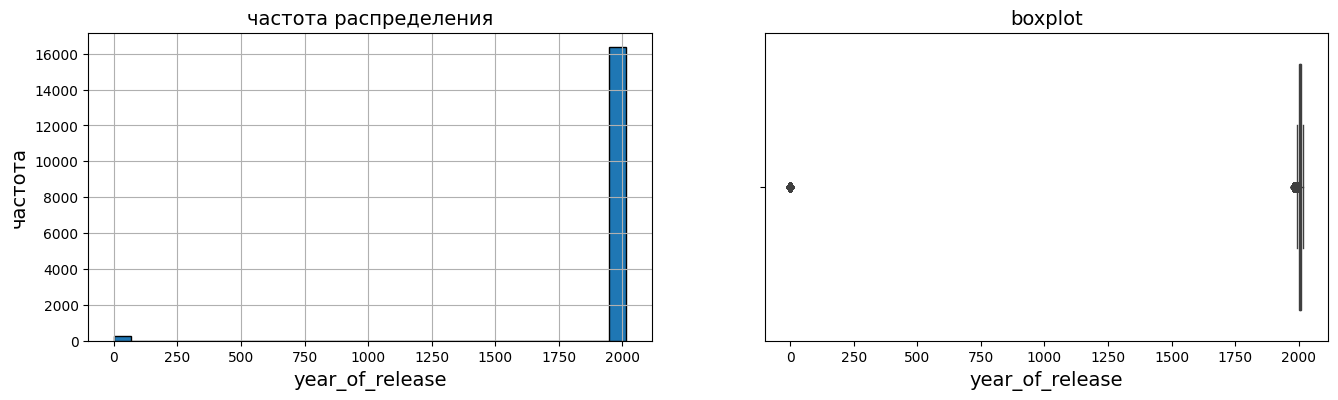

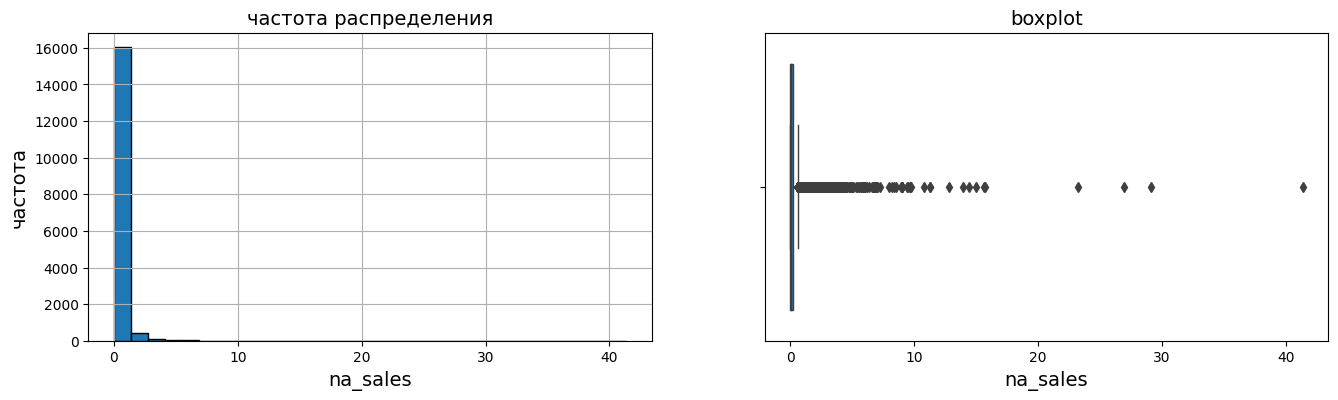

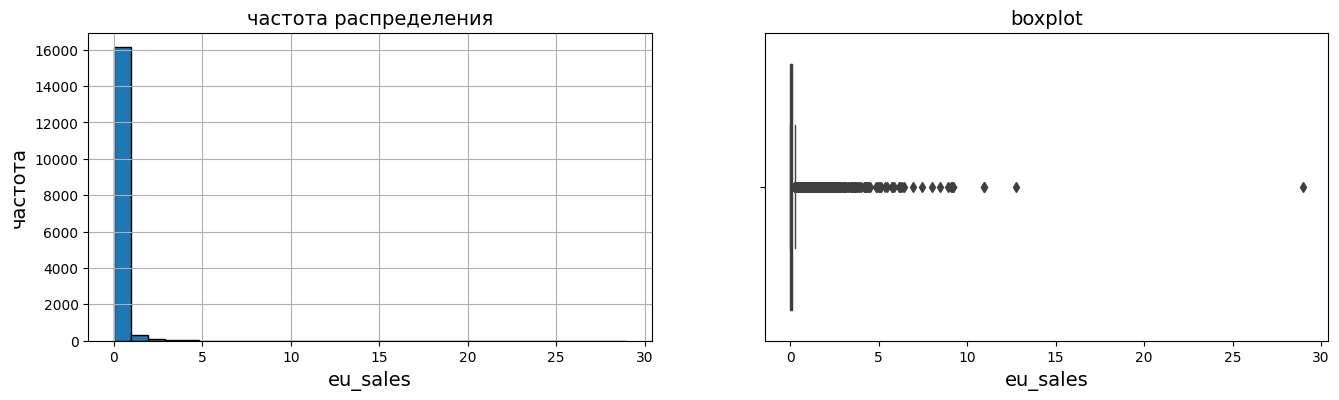

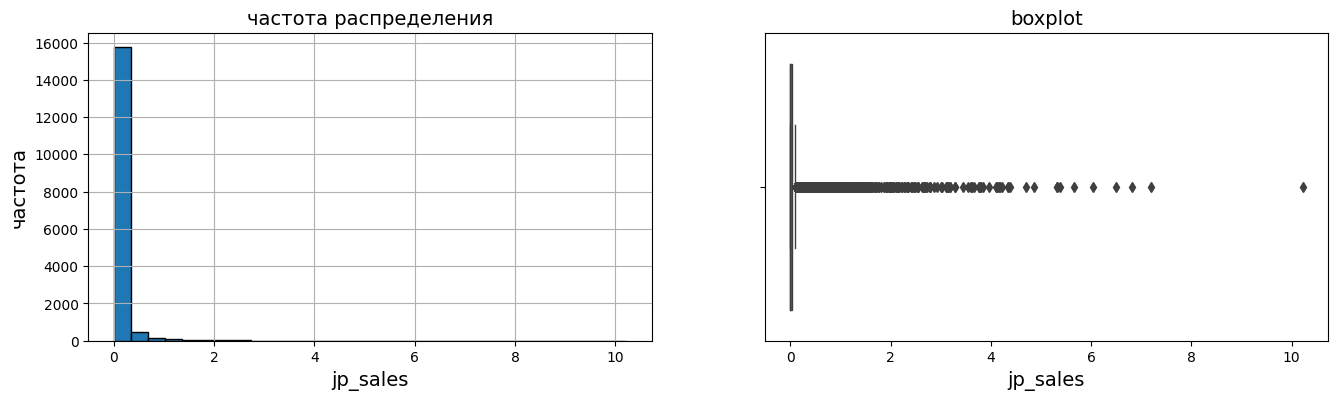

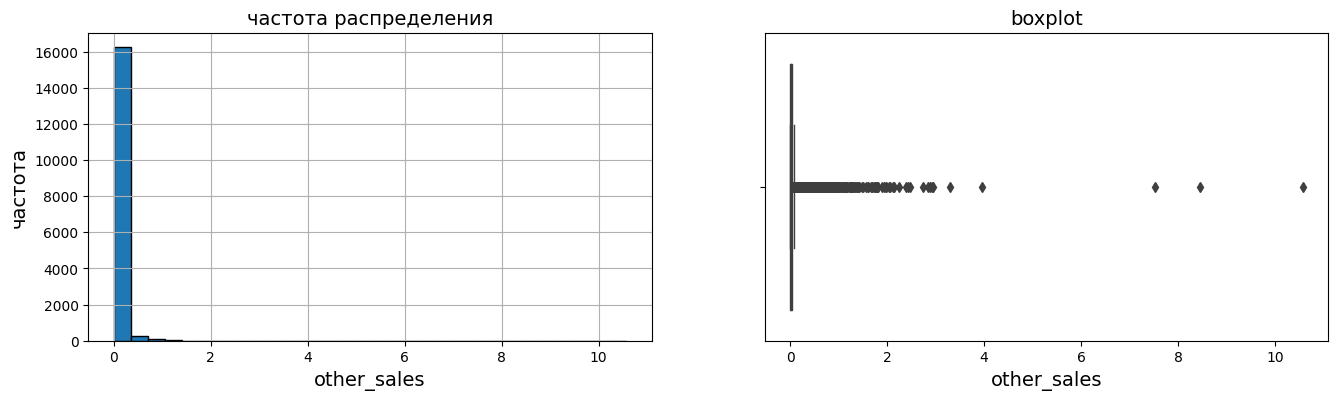

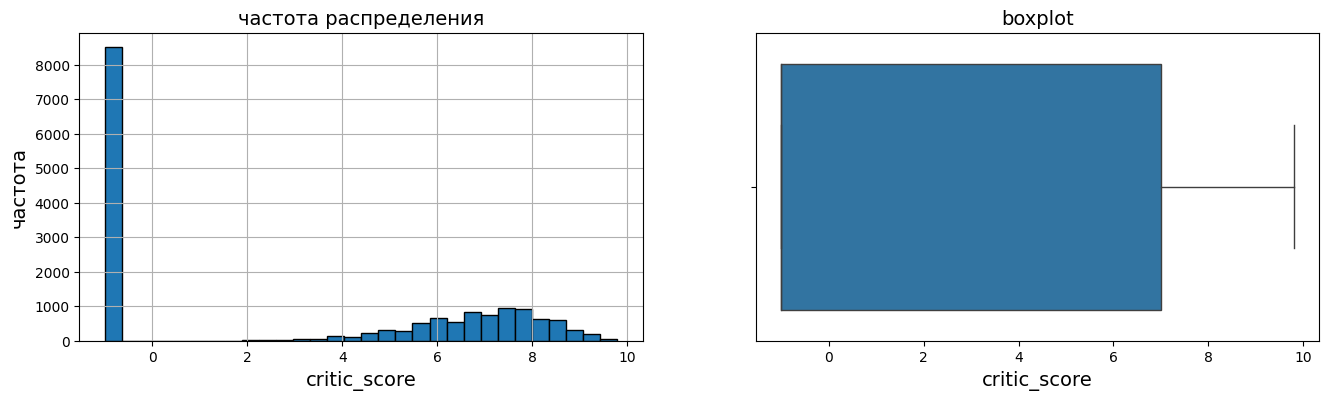

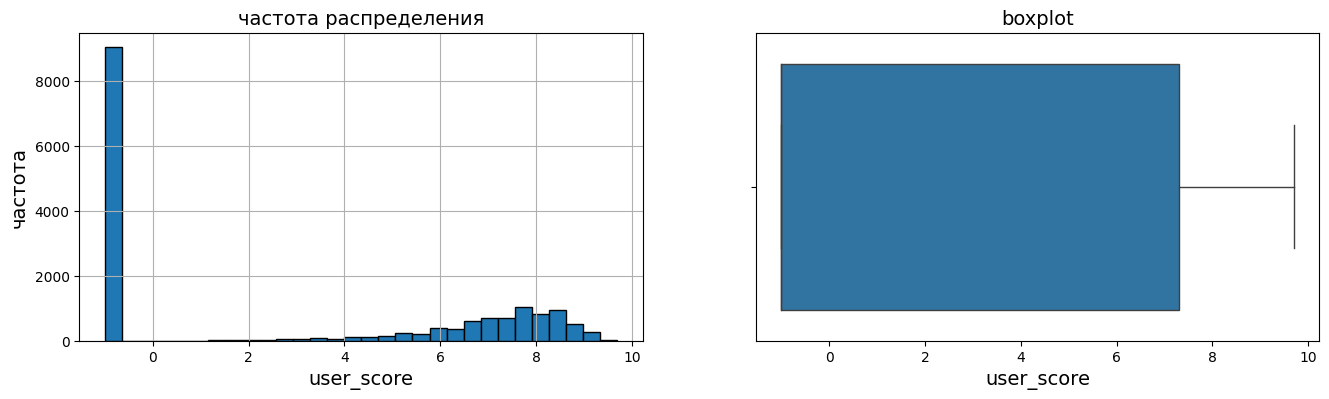

In [ ]:
for column in stat.columns:

    plots(stat[column], column, n_bins=30)

**Вывод**<br>
- В столбце 'year_of_release' нет выбросов, значения равные нулю означают отсутсвие данных о годе
- В столбцах 'na_sales', 'eu_sales', 'jp_sales', 'other_sales' есть большое количество выбросов
- В столбцах 'critic_score', 'user_score' нет левой границы и выбросов
- В столбце 'all_region_sales' есть большое количество выбросов

5. Установите, есть ли линейная связь между числовыми признаками. Если есть, то
между какими признаками и насколько она сильная.

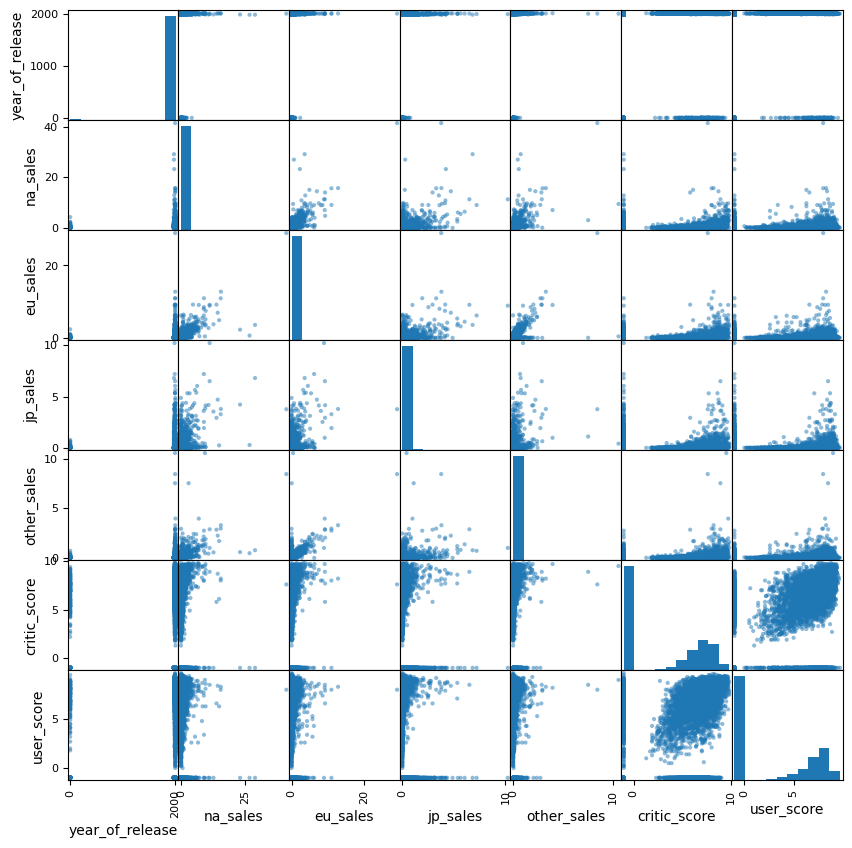

In [ ]:
pd.plotting.scatter_matrix(stat, figsize=(10, 10))

plt.show()

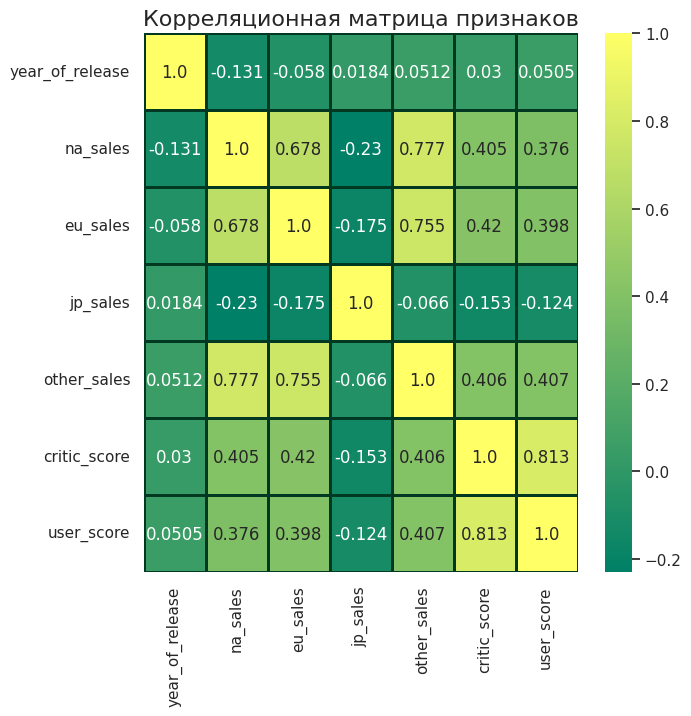

In [ ]:
sns.set(rc = {'figure.figsize':(7,7)})

sns.heatmap(stat.corr(method='spearman'), annot = True, fmt='.3', cmap= 'summer', linewidths=1, linecolor='#003822')

plt.title('Корреляционная матрица признаков', fontsize=16)

plt.show()

**Вывод**<br>
- 'na_sales' и 'eu_sales' имеют слабую положительную связь
- 'na_sales' и 'other_sales' имеют сильную положительную связь
- 'eu_sales' и 'other_sales' имеют сильную положительную связь
- 'critic_score' и 'user_score' имеют сильную положительную связь

***

#### Шаг 2.8. Добавление новых столбцов
<a id='2.8_задание'></a>
[К содержанию](#2.8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16619 entries, 0 to 16618
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16619 non-null  object 
 1   platform         16619 non-null  object 
 2   year_of_release  16619 non-null  int64  
 3   genre            16619 non-null  object 
 4   na_sales         16619 non-null  float64
 5   eu_sales         16619 non-null  float64
 6   jp_sales         16619 non-null  float64
 7   other_sales      16619 non-null  float64
 8   critic_score     16619 non-null  float64
 9   user_score       16619 non-null  float64
 10  rating           16619 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**2.8.1.** Добавьте столбец, в котором рассчитайте общее количество продаж во всех регионах.

In [ ]:
columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
data['all_region_sales'] = data[columns].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,7.60,8.00,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.00,-1.00,nd,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,8.20,8.30,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,8.00,8.00,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,nd,31.38


**2.8.2.** Добавьте столбец с категоризацией данных по числовым диапазонам.

In [ ]:
def categorization(user_score):

    if user_score <= 3.3:
        return '0.0-3.3'
    if user_score <= 5:
        return '3.4-5.0'
    if user_score <= 6.6:
        return '5.1-6.6'
    return '6.7-10.0'

In [ ]:
data['categorization'] = data['user_score'].apply(categorization)
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales,categorization
10238,nhl rivals 2004,xb,2003,sports,0.08,0.02,0.00,0.00,6.50,8.80,e,0.10,6.7-10.0
12002,tornado,ds,0,action,0.07,0.00,0.00,0.00,4.40,-1.00,e,0.07,0.0-3.3
3681,spec ops: the line,ps3,2012,shooter,0.19,0.23,0.04,0.08,7.70,8.00,m,0.54,6.7-10.0
141,kinect sports,x360,2010,sports,3.92,1.73,0.03,0.51,7.30,7.40,e10+,6.19,6.7-10.0
4935,super famista 3,snes,1994,sports,0.00,0.00,0.39,0.00,-1.00,-1.00,nd,0.39,0.0-3.3


**2.8.3.** Добавьте столбец, используя функцию для одной строки.

In [ ]:
data['all_region_sales'].mean()

0.5362759492147543

In [ ]:
def popular_user(row):

    categorization = row['categorization']
    all_region_sales	 = row['all_region_sales']

    if categorization == '6.7-10.0':
      # если игра популярна, то продажи должны быть выше среднего
        if all_region_sales	 >= 0.54:
            return 'yes'

        return '-'

    return '-'

In [ ]:
data['popular_user'] = data.apply(popular_user, axis=1)

data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales,categorization,popular_user
1758,gauntlet: dark legacy,ps2,2001,action,0.56,0.44,0.00,0.15,7.30,8.30,t,1.15,6.7-10.0,yes
3655,purr pals,ds,2007,simulation,0.18,0.35,0.00,0.02,6.70,6.80,e,0.55,6.7-10.0,yes
14585,konpeki no kantai,snes,1995,strategy,0.00,0.00,0.03,0.00,-1.00,-1.00,nd,0.03,0.0-3.3,-
5636,tetris 2 + bombliss,nes,1991,puzzle,0.00,0.00,0.32,0.00,-1.00,-1.00,nd,0.32,0.0-3.3,-
16260,virtua tennis 3,pc,2007,sports,0.00,0.01,0.00,0.00,-1.00,7.40,e,0.01,6.7-10.0,-
5654,all-star baseball 2005,ps2,0,sports,0.16,0.12,0.00,0.04,7.20,8.60,e,0.32,6.7-10.0,-
7632,wing arms,sat,1994,shooter,0.00,0.00,0.20,0.00,-1.00,-1.00,nd,0.20,0.0-3.3,-
3183,taiko no tatsujin: chibi dragon to fushigi na orb,3ds,2012,misc,0.00,0.00,0.63,0.00,-1.00,-1.00,nd,0.63,0.0-3.3,-
2285,sonic mega collection plus,xb,2004,misc,0.61,0.26,0.00,0.04,7.50,7.90,e,0.91,6.7-10.0,yes
11707,dragon force ii: kamisarishi daichi ni,sat,1998,strategy,0.00,0.00,0.08,0.00,-1.00,-1.00,nd,0.08,0.0-3.3,-


Задания из Индивидуальное задание (часть 1). Предобработка данных

1. Рассчитайте количество выпущенных игр по годам, по платформам.

a) По годам

In [ ]:
games_group = data.groupby('year_of_release').agg({'name':'count'})
games_group = games_group.rename(columns={'name' : 'Кол-во игр: '})
games_group

,Кол-во игр:
year_of_release,
0,269
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


По таблице можно сказать, что по многим играм нет информации о годе релиза, для корректного пострения графика их будет правильным проигнорировать

In [ ]:
games_group1 = data[data['year_of_release'] != 0].groupby('year_of_release').agg({'name':'count'})
games_group1 = games_group1.rename(columns={'name' : 'Кол-во игр:'})
games_group1

,Кол-во игр:
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<Figure size 700x700 with 0 Axes>

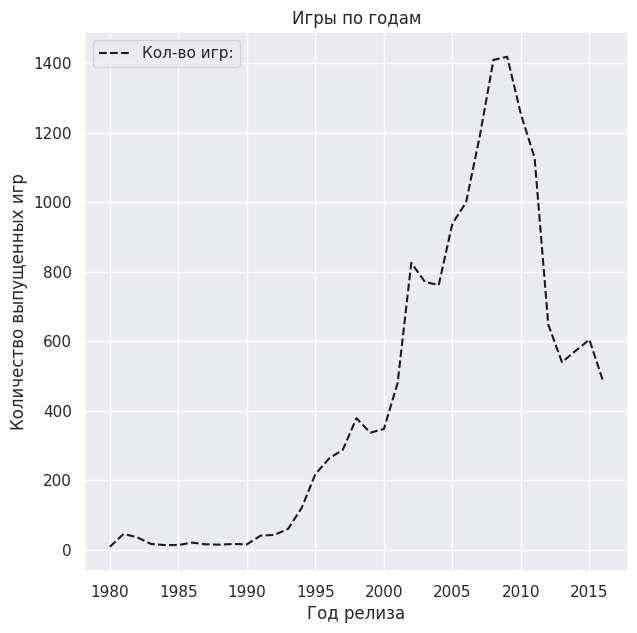

In [ ]:
df = pd.DataFrame(games_group1)
plt.figure()
df.plot(style='k--', title='Игры по годам')
plt.xlabel('Год релиза')
plt.ylabel('Количество выпущенных игр')
plt.legend(loc='best')
plt.show()

b) По платфорам

In [ ]:
games_group2 = data.groupby('platform').agg({'name':'count'})
games_group2

,name
platform,
2600,133
3do,3
3ds,515
dc,52
ds,2141
gb,98
gba,815
gc,554
gen,27


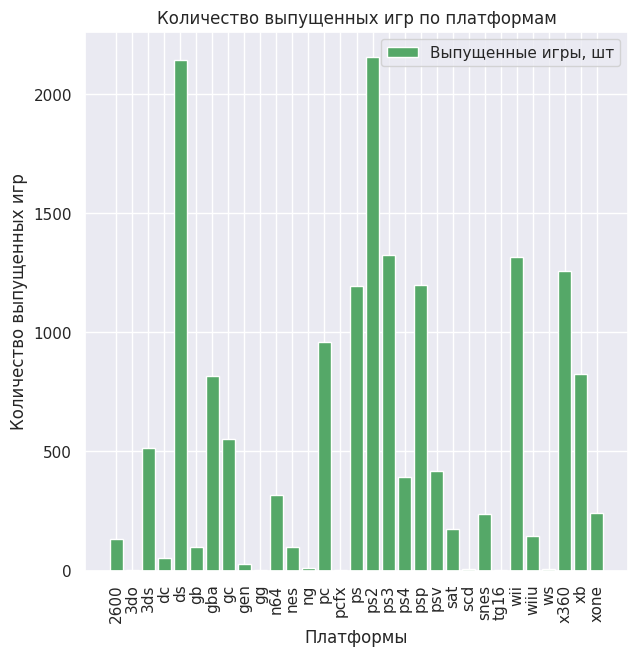

In [ ]:
platform = data['platform'].value_counts().sort_index()

plt.bar(platform.index, platform.values, color='g', alpha=1)

plt.title('Количество выпущенных игр по платформам')
plt.xlabel('Платформы')
plt.ylabel('Количество выпущенных игр')

plt.xticks(rotation=90)

plt.legend(['Выпущенные игры, шт'])
plt.show()

2. Выведите список топ-5 самых продаваемых игр по годам, по платформам, по
жанрам.

a) По годам (с 2012 по 2016)

2012 г

In [ ]:
sales_2012 = data.query('year_of_release == 2012').sort_values('all_region_sales', ascending=False).head(5)[['year_of_release','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_2012

,year_of_release,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
34,2012,call of duty: black ops ii,4.99,5.73,0.65,2.42,13.79
35,2012,call of duty: black ops ii,8.25,4.24,0.07,1.12,13.68
62,2012,new super mario bros. 2,3.66,3.14,2.47,0.63,9.90
66,2012,halo 4,6.65,2.28,0.04,0.74,9.71
73,2012,animal crossing: new leaf,2.03,2.36,4.39,0.39,9.17


2013 г

In [ ]:
sales_2013 = data.query('year_of_release == 2013').sort_values('all_region_sales', ascending=False).head(5)[['year_of_release','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_2013

,year_of_release,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
16,2013,grand theft auto v,7.02,9.09,0.98,3.96,21.05
23,2013,grand theft auto v,9.66,5.14,0.06,1.41,16.27
33,2013,pokemon x/pokemon y,5.28,4.19,4.35,0.78,14.60
60,2013,call of duty: ghosts,6.73,2.56,0.04,0.91,10.24
69,2013,call of duty: ghosts,4.10,3.63,0.38,1.25,9.36


2014 г

In [ ]:
sales_2014 = data.query('year_of_release == 2014').sort_values('all_region_sales', ascending=False).head(5)[['year_of_release','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_2014

,year_of_release,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
42,2014,grand theft auto v,3.96,6.31,0.38,1.97,12.62
47,2014,pokemon omega ruby/pokemon alpha sapphire,4.35,3.49,3.10,0.74,11.68
92,2014,call of duty: advanced warfare,2.81,3.48,0.14,1.23,7.66
96,2014,super smash bros. for wii u and 3ds,3.27,1.37,2.43,0.48,7.55
110,2014,mario kart 8,3.15,2.15,1.28,0.51,7.09


2015 г

In [ ]:
sales_2015 = data.query('year_of_release == 2015').sort_values('all_region_sales', ascending=False).head(5)[['year_of_release','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_2015

,year_of_release,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
31,2015,call of duty: black ops 3,6.03,5.86,0.36,2.38,14.63
77,2015,fifa 16,1.12,6.12,0.06,1.28,8.58
87,2015,star wars battlefront (2015),2.99,3.49,0.22,1.28,7.98
99,2015,call of duty: black ops 3,4.59,2.11,0.01,0.68,7.39
105,2015,fallout 4,2.53,3.27,0.24,1.13,7.17


2016 г

In [ ]:
sales_2016 = data.query('year_of_release == 2016').sort_values('all_region_sales', ascending=False).head(5)[['year_of_release','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_2016

,year_of_release,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
94,2016,fifa 17,0.66,5.75,0.08,1.11,7.60
108,2016,pokemon sun/moon,2.98,1.45,2.26,0.45,7.14
171,2016,uncharted 4: a thief's end,1.85,2.50,0.19,0.85,5.39
245,2016,call of duty: infinite warfare,1.61,2.00,0.15,0.71,4.47
289,2016,battlefield 1,1.10,2.15,0.21,0.61,4.07


Сводная таблица топ-5 игр по годам

In [ ]:
top_5_years = pd.concat([sales_2012, sales_2013, sales_2014, sales_2015, sales_2016], sort=False, axis=0)
top_5_years

,year_of_release,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
34,2012,call of duty: black ops ii,4.99,5.73,0.65,2.42,13.79
35,2012,call of duty: black ops ii,8.25,4.24,0.07,1.12,13.68
62,2012,new super mario bros. 2,3.66,3.14,2.47,0.63,9.90
66,2012,halo 4,6.65,2.28,0.04,0.74,9.71
73,2012,animal crossing: new leaf,2.03,2.36,4.39,0.39,9.17
16,2013,grand theft auto v,7.02,9.09,0.98,3.96,21.05
23,2013,grand theft auto v,9.66,5.14,0.06,1.41,16.27
33,2013,pokemon x/pokemon y,5.28,4.19,4.35,0.78,14.60
60,2013,call of duty: ghosts,6.73,2.56,0.04,0.91,10.24
69,2013,call of duty: ghosts,4.10,3.63,0.38,1.25,9.36


b) По платформам (больше 100 игр)

In [ ]:
spisok_platform = data['platform'].value_counts()
spisok_platform

ps2     2154
ds      2141
ps3     1324
wii     1316
x360    1258
psp     1200
ps      1195
pc       958
xb       824
gba      815
gc       554
3ds      515
psv      417
ps4      392
n64      317
xone     242
snes     239
sat      173
wiiu     146
2600     133
nes       98
gb        98
dc        52
gen       27
ng        12
scd        6
ws         6
3do        3
tg16       2
gg         1
pcfx       1
Name: platform, dtype: int64

ps2

In [ ]:
sales_ps2 = data.query('platform == "ps2"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_ps2

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
17,ps2,grand theft auto: san andreas,9.43,0.40,0.41,10.57,20.81
24,ps2,grand theft auto: vice city,8.41,5.49,0.47,1.78,16.15
28,ps2,gran turismo 3: a-spec,6.85,5.09,1.87,1.16,14.97
38,ps2,grand theft auto iii,6.99,4.51,0.30,1.30,13.10
48,ps2,gran turismo 4,3.01,0.01,1.10,7.53,11.65


ds

In [ ]:
sales_ds = data.query('platform == "ds"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_ds

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
6,ds,new super mario bros.,11.28,9.14,6.50,2.88,29.80
10,ds,nintendogs,9.05,10.95,1.93,2.74,24.67
11,ds,mario kart ds,9.71,7.47,4.13,1.90,23.21
19,ds,brain age: train your brain in minutes a day,4.74,9.20,4.16,2.04,20.14
20,ds,pokemon diamond/pokemon pearl,6.38,4.46,6.04,1.36,18.24


ps3

In [ ]:
sales_ps3 = data.query('platform == "ps3"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_ps3

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
16,ps3,grand theft auto v,7.02,9.09,0.98,3.96,21.05
34,ps3,call of duty: black ops ii,4.99,5.73,0.65,2.42,13.79
37,ps3,call of duty: modern warfare 3,5.54,5.73,0.49,1.57,13.33
41,ps3,call of duty: black ops,5.99,4.37,0.48,1.79,12.63
54,ps3,gran turismo 5,2.96,4.82,0.81,2.11,10.70


wii

In [ ]:
sales_wii = data.query('platform == "wii"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_wii

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
0,wii,wii sports,41.36,28.96,3.77,8.45,82.54
2,wii,mario kart wii,15.68,12.76,3.79,3.29,35.52
3,wii,wii sports resort,15.61,10.93,3.28,2.95,32.77
7,wii,wii play,13.96,9.18,2.93,2.84,28.91
8,wii,new super mario bros. wii,14.44,6.94,4.70,2.24,28.32


x360

In [ ]:
sales_x360 = data.query('platform == "x360"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_x360

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
14,x360,kinect adventures,15.00,4.89,0.24,1.69,21.82
23,x360,grand theft auto v,9.66,5.14,0.06,1.41,16.27
29,x360,call of duty: modern warfare 3,9.04,4.24,0.13,1.32,14.73
32,x360,call of duty: black ops,9.70,3.68,0.11,1.13,14.62
35,x360,call of duty: black ops ii,8.25,4.24,0.07,1.12,13.68


psp

In [ ]:
sales_psp = data.query('platform == "psp"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_psp

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
91,psp,grand theft auto: liberty city stories,2.90,2.81,0.24,1.73,7.68
163,psp,monster hunter freedom unite,0.47,0.55,4.13,0.34,5.49
204,psp,grand theft auto: vice city stories,1.70,1.99,0.16,1.18,5.03
215,psp,monster hunter freedom 3,0.00,0.00,4.87,0.00,4.87
272,psp,daxter,2.45,1.01,0.00,0.75,4.21


ps

In [ ]:
sales_ps = data.query('platform == "ps"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_ps

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
52,ps,gran turismo,4.02,3.87,2.54,0.52,10.95
65,ps,final fantasy vii,3.01,2.47,3.28,0.96,9.72
67,ps,gran turismo 2,3.88,3.42,1.69,0.50,9.49
88,ps,final fantasy viii,2.28,1.72,3.63,0.23,7.86
95,ps,crash bandicoot 2: cortex strikes back,3.78,2.17,1.31,0.31,7.57


pc

In [ ]:
sales_pc = data.query('platform == "pc"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_pc

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
85,pc,the sims 3,0.99,6.42,0.00,0.60,8.01
138,pc,world of warcraft,0.08,6.21,0.00,0.00,6.29
192,pc,diablo iii,2.44,2.16,0.00,0.54,5.14
195,pc,microsoft flight simulator,3.22,1.69,0.00,0.20,5.11
218,pc,starcraft ii: wings of liberty,2.57,1.68,0.00,0.58,4.83


xb

In [ ]:
sales_xb = data.query('platform == "xb"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_xb

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
78,xb,halo 2,6.82,1.53,0.05,0.08,8.48
129,xb,halo: combat evolved,4.98,1.30,0.08,0.07,6.43
466,xb,tom clancy's splinter cell,1.85,1.04,0.00,0.13,3.02
508,xb,the elder scrolls iii: morrowind,2.09,0.63,0.03,0.11,2.86
569,xb,fable,1.99,0.58,0.00,0.09,2.66


gba

In [ ]:
sales_gba = data.query('platform == "gba"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_gba

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
25,gba,pokemon ruby/pokemon sapphire,6.06,3.90,5.38,0.50,15.84
58,gba,pokemon firered/pokemon leafgreen,4.34,2.65,3.15,0.35,10.49
131,gba,pokémon emerald version,2.57,1.58,2.06,0.21,6.42
162,gba,super mario advance,3.14,1.24,0.91,0.20,5.49
166,gba,mario kart: super circuit,2.62,1.64,0.99,0.23,5.48


gc

In [ ]:
sales_gc = data.query('platform == "gc"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_gc

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
111,gc,super smash bros. melee,4.41,1.04,1.39,0.22,7.06
112,gc,mario kart: double dash,4.12,1.77,0.87,0.19,6.95
136,gc,super mario sunshine,4.01,1.26,0.87,0.17,6.31
233,gc,the legend of zelda: the wind waker,2.60,0.99,0.89,0.13,4.61
356,gc,luigi's mansion,2.38,0.67,0.46,0.10,3.61


3ds

In [ ]:
sales_3ds = data.query('platform == "3ds"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_3ds

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
33,3ds,pokemon x/pokemon y,5.28,4.19,4.35,0.78,14.60
40,3ds,mario kart 7,5.03,4.02,2.69,0.91,12.65
47,3ds,pokemon omega ruby/pokemon alpha sapphire,4.35,3.49,3.10,0.74,11.68
53,3ds,super mario 3d land,4.89,3.00,2.14,0.78,10.81
62,3ds,new super mario bros. 2,3.66,3.14,2.47,0.63,9.90


psv

In [ ]:
sales_psv = data.query('platform == "psv"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_psv

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
867,psv,minecraft,0.18,0.64,0.90,0.24,1.96
1218,psv,uncharted: golden abyss,0.53,0.66,0.13,0.22,1.54
1293,psv,call of duty black ops: declassified,0.71,0.43,0.07,0.26,1.47
1484,psv,assassin's creed iii: liberation,0.53,0.48,0.06,0.24,1.31
1594,psv,littlebigplanet ps vita,0.35,0.61,0.02,0.27,1.25


ps4

In [ ]:
sales_ps4 = data.query('platform == "ps4"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_ps4

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
31,ps4,call of duty: black ops 3,6.03,5.86,0.36,2.38,14.63
42,ps4,grand theft auto v,3.96,6.31,0.38,1.97,12.62
77,ps4,fifa 16,1.12,6.12,0.06,1.28,8.58
87,ps4,star wars battlefront (2015),2.99,3.49,0.22,1.28,7.98
92,ps4,call of duty: advanced warfare,2.81,3.48,0.14,1.23,7.66


n64

In [ ]:
sales_n64 = data.query('platform == "n64"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_n64

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
45,n64,super mario 64,6.91,2.85,1.91,0.23,11.90
63,n64,mario kart 64,5.55,1.94,2.23,0.15,9.87
82,n64,goldeneye 007,5.80,2.01,0.13,0.15,8.09
93,n64,the legend of zelda: ocarina of time,4.10,1.89,1.45,0.16,7.60
158,n64,super smash bros.,2.95,0.60,1.97,0.04,5.56


xone

In [ ]:
sales_xone = data.query('platform == "xone"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_xone

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
99,xone,call of duty: black ops 3,4.59,2.11,0.01,0.68,7.39
165,xone,grand theft auto v,2.81,2.19,0.00,0.47,5.47
179,xone,call of duty: advanced warfare,3.22,1.55,0.01,0.48,5.26
242,xone,halo 5: guardians,2.78,1.27,0.03,0.41,4.49
270,xone,fallout 4,2.51,1.32,0.01,0.38,4.22


snes

In [ ]:
sales_snes = data.query('platform == "snes"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_snes

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
18,snes,super mario world,12.78,3.75,3.54,0.55,20.62
56,snes,super mario all-stars,5.99,2.15,2.12,0.29,10.55
71,snes,donkey kong country,4.36,1.71,3.00,0.23,9.30
76,snes,super mario kart,3.54,1.24,3.81,0.18,8.77
137,snes,street fighter ii: the world warrior,2.47,0.83,2.87,0.12,6.29


sat

In [ ]:
sales_sat = data.query('platform == "sat"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_sat

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
892,sat,virtua fighter 2,0.34,0.26,1.30,0.03,1.93
1747,sat,sega rally championship,0.21,0.16,0.77,0.02,1.16
1919,sat,virtua fighter,0.17,0.12,0.77,0.02,1.08
3253,sat,fighters megamix,0.00,0.00,0.62,0.00,0.62
3221,sat,virtua cop,0.00,0.00,0.62,0.00,0.62


wiiu

In [ ]:
sales_wiiu = data.query('platform == "wiiu"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_wiiu

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
110,wiiu,mario kart 8,3.15,2.15,1.28,0.51,7.09
185,wiiu,new super mario bros. u,2.30,1.34,1.27,0.32,5.23
216,wiiu,super smash bros. for wii u and 3ds,2.60,1.08,0.81,0.38,4.87
247,wiiu,splatoon,1.54,1.18,1.46,0.26,4.44
248,wiiu,nintendo land,2.52,1.11,0.46,0.33,4.42


2600

In [ ]:
sales_2600 = data.query('platform == "2600"').sort_values('all_region_sales', ascending=False).head(5)[['platform','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_2600

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
89,2600,pac-man,7.28,0.45,0.00,0.08,7.81
240,2600,pitfall,4.21,0.24,0.00,0.05,4.50
262,2600,asteroids,4.00,0.26,0.00,0.05,4.31
546,2600,missile command,2.56,0.17,0.00,0.03,2.76
609,2600,space invaders,2.36,0.14,0.00,0.03,2.53


Сводная таблица топ-5 игр по платформам

In [ ]:
top_5_platform = pd.concat([sales_ps2, sales_ds, sales_ps3, sales_wii, sales_x360, sales_psp, sales_ps, sales_pc, sales_xb, sales_gba, sales_gc, sales_3ds, sales_psv, sales_ps4, sales_n64, sales_xone, sales_snes, sales_sat, sales_wiiu, sales_2600], sort=False, axis=0)
top_5_platform

,platform,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
17,ps2,grand theft auto: san andreas,9.43,0.40,0.41,10.57,20.81
24,ps2,grand theft auto: vice city,8.41,5.49,0.47,1.78,16.15
28,ps2,gran turismo 3: a-spec,6.85,5.09,1.87,1.16,14.97
38,ps2,grand theft auto iii,6.99,4.51,0.30,1.30,13.10
48,ps2,gran turismo 4,3.01,0.01,1.10,7.53,11.65
...,...,...,...,...,...,...,...
89,2600,pac-man,7.28,0.45,0.00,0.08,7.81
240,2600,pitfall,4.21,0.24,0.00,0.05,4.50
262,2600,asteroids,4.00,0.26,0.00,0.05,4.31
546,2600,missile command,2.56,0.17,0.00,0.03,2.76


c) По жанрам

In [ ]:
spisok_genres = data['genre'].value_counts()
spisok_genres

action          3343
sports          2337
misc            1745
role-playing    1493
shooter         1321
adventure       1283
racing          1243
platform         886
simulation       869
fighting         847
strategy         679
puzzle           573
Name: genre, dtype: int64

action

In [ ]:
sales_action = data.query('genre == "action"').sort_values('all_region_sales', ascending=False).head(5)[
    ['genre','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_action

,genre,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
16,action,grand theft auto v,7.02,9.09,0.98,3.96,21.05
17,action,grand theft auto: san andreas,9.43,0.40,0.41,10.57,20.81
23,action,grand theft auto v,9.66,5.14,0.06,1.41,16.27
24,action,grand theft auto: vice city,8.41,5.49,0.47,1.78,16.15
38,action,grand theft auto iii,6.99,4.51,0.30,1.30,13.10


sports

In [ ]:
sales_sports = data.query('genre == "sports"').sort_values('all_region_sales', ascending=False).head(5)[
    ['genre','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_sports

,genre,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
0,sports,wii sports,41.36,28.96,3.77,8.45,82.54
3,sports,wii sports resort,15.61,10.93,3.28,2.95,32.77
13,sports,wii fit,8.92,8.03,3.60,2.15,22.70
15,sports,wii fit plus,9.01,8.49,2.53,1.77,21.80
77,sports,fifa 16,1.12,6.12,0.06,1.28,8.58


misc

In [ ]:
sales_misc = data.query('genre == "misc"').sort_values('all_region_sales', ascending=False).head(5)[['genre','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_misc

,genre,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
7,misc,wii play,13.96,9.18,2.93,2.84,28.91
14,misc,kinect adventures,15.00,4.89,0.24,1.69,21.82
19,misc,brain age: train your brain in minutes a day,4.74,9.20,4.16,2.04,20.14
61,misc,just dance 3,5.95,3.11,0.00,1.06,10.12
68,misc,just dance 2,5.80,2.85,0.01,0.78,9.44


role-playing

In [ ]:
sales_role_playing = data.query('genre == "role-playing"').sort_values('all_region_sales', ascending=False).head(5)[['genre','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_role_playing

,genre,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
4,role-playing,pokemon red/pokemon blue,11.27,8.89,10.22,1.00,31.38
12,role-playing,pokemon gold/pokemon silver,9.00,6.18,7.20,0.71,23.09
20,role-playing,pokemon diamond/pokemon pearl,6.38,4.46,6.04,1.36,18.24
25,role-playing,pokemon ruby/pokemon sapphire,6.06,3.90,5.38,0.50,15.84
27,role-playing,pokemon black/pokemon white,5.51,3.17,5.65,0.80,15.13


shooter

In [ ]:
sales_shooter = data.query('genre == "shooter"').sort_values('all_region_sales', ascending=False).head(5)[['genre','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_shooter

,genre,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
9,shooter,duck hunt,26.93,0.63,0.28,0.47,28.31
29,shooter,call of duty: modern warfare 3,9.04,4.24,0.13,1.32,14.73
31,shooter,call of duty: black ops 3,6.03,5.86,0.36,2.38,14.63
32,shooter,call of duty: black ops,9.70,3.68,0.11,1.13,14.62
34,shooter,call of duty: black ops ii,4.99,5.73,0.65,2.42,13.79


adventure

In [ ]:
sales_adventure = data.query('genre == "adventure"').sort_values('all_region_sales', ascending=False).head(5)[['genre','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_adventure

,genre,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
50,adventure,super mario land 2: 6 golden coins,6.16,2.04,2.69,0.29,11.18
160,adventure,assassin's creed,3.28,1.64,0.07,0.56,5.55
219,adventure,assassin's creed,1.91,2.00,0.09,0.82,4.82
252,adventure,zelda ii: the adventure of link,2.19,0.50,1.61,0.08,4.38
402,adventure,rugrats: search for reptar,1.63,1.53,0.00,0.18,3.34


racing

In [ ]:
sales_racing = data.query('genre == "racing"').sort_values('all_region_sales', ascending=False).head(5)[['genre','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_racing

,genre,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
2,racing,mario kart wii,15.68,12.76,3.79,3.29,35.52
11,racing,mario kart ds,9.71,7.47,4.13,1.90,23.21
28,racing,gran turismo 3: a-spec,6.85,5.09,1.87,1.16,14.97
40,racing,mario kart 7,5.03,4.02,2.69,0.91,12.65
48,racing,gran turismo 4,3.01,0.01,1.10,7.53,11.65


platform

In [ ]:
sales_platform = data.query('genre == "platform"').sort_values('all_region_sales', ascending=False).head(5)[['genre','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_platform

,genre,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
1,platform,super mario bros.,29.08,3.58,6.81,0.77,40.24
6,platform,new super mario bros.,11.28,9.14,6.50,2.88,29.80
8,platform,new super mario bros. wii,14.44,6.94,4.70,2.24,28.32
18,platform,super mario world,12.78,3.75,3.54,0.55,20.62
21,platform,super mario land,10.83,2.71,4.18,0.42,18.14


simulation

In [ ]:
sales_simulation = data.query('genre == "simulation"').sort_values('all_region_sales', ascending=False).head(5)[['genre','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_simulation

,genre,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
10,simulation,nintendogs,9.05,10.95,1.93,2.74,24.67
43,simulation,animal crossing: wild world,2.50,3.45,5.33,0.86,12.14
73,simulation,animal crossing: new leaf,2.03,2.36,4.39,0.39,9.17
85,simulation,the sims 3,0.99,6.42,0.00,0.60,8.01
156,simulation,cooking mama,3.07,1.91,0.07,0.57,5.62


fighting

In [ ]:
sales_fighting = data.query('genre == "fighting"').sort_values('all_region_sales', ascending=False).head(5)[['genre','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_fighting

,genre,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
39,fighting,super smash bros. brawl,6.62,2.55,2.66,1.01,12.84
96,fighting,super smash bros. for wii u and 3ds,3.27,1.37,2.43,0.48,7.55
106,fighting,tekken 3,3.27,2.22,1.40,0.29,7.18
111,fighting,super smash bros. melee,4.41,1.04,1.39,0.22,7.06
137,fighting,street fighter ii: the world warrior,2.47,0.83,2.87,0.12,6.29


strategy

In [ ]:
sales_strategy = data.query('genre == "strategy"').sort_values('all_region_sales', ascending=False).head(5)[['genre','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_strategy

,genre,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
168,strategy,pokemon stadium,3.18,1.24,0.94,0.09,5.45
206,strategy,warzone 2100,2.79,1.89,0.00,0.33,5.01
218,strategy,starcraft ii: wings of liberty,2.57,1.68,0.00,0.58,4.83
273,strategy,warcraft ii: tides of darkness,1.70,2.27,0.00,0.23,4.20
339,strategy,pokémon trading card game,1.49,0.73,1.38,0.10,3.70


puzzle

In [ ]:
sales_puzzle = data.query('genre == "puzzle"').sort_values('all_region_sales', ascending=False).head(5)[['genre','name', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
sales_puzzle

,genre,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
5,puzzle,tetris,23.20,2.26,4.22,0.58,30.26
26,puzzle,brain age 2: more training in minutes a day,3.43,5.35,5.32,1.18,15.28
89,puzzle,pac-man,7.28,0.45,0.00,0.08,7.81
157,puzzle,tetris,2.97,0.69,1.81,0.11,5.58
172,puzzle,dr. mario,2.18,0.96,2.00,0.20,5.34


Сводная таблица топ-5 игр по жанрам

In [ ]:
top_5_genre = pd.concat([sales_action, sales_sports, sales_misc, sales_role_playing, sales_shooter, sales_adventure, sales_racing, sales_platform, sales_simulation, sales_fighting, sales_strategy, sales_puzzle], sort=False, axis=0)
top_5_genre

,genre,name,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
16,action,grand theft auto v,7.02,9.09,0.98,3.96,21.05
17,action,grand theft auto: san andreas,9.43,0.40,0.41,10.57,20.81
23,action,grand theft auto v,9.66,5.14,0.06,1.41,16.27
24,action,grand theft auto: vice city,8.41,5.49,0.47,1.78,16.15
38,action,grand theft auto iii,6.99,4.51,0.30,1.30,13.10
0,sports,wii sports,41.36,28.96,3.77,8.45,82.54
3,sports,wii sports resort,15.61,10.93,3.28,2.95,32.77
13,sports,wii fit,8.92,8.03,3.60,2.15,22.70
15,sports,wii fit plus,9.01,8.49,2.53,1.77,21.80
77,sports,fifa 16,1.12,6.12,0.06,1.28,8.58


С помощью метода query удалось получить статистику выпуска игр по годам, по платформам, по жанрам.

3. Узнайте, на какой платформе было выпущено больше всего игр.

In [ ]:
counts_platform = data['platform'].value_counts()
most_platform = counts_platform.idxmax()
print(f"Больше всего игр было выпущено на платформе - {most_platform} ")

Больше всего игр было выпущено на платформе - ps2 


4. Определите, игр какого жанра больше всего.

In [ ]:
counts_genre = data['genre'].value_counts()
most_genre = counts_genre.idxmax()
print(f"Больше всего игр жанра - {most_genre}")

Больше всего игр жанра - action


Проверка

In [ ]:
counts_genre

action          3343
sports          2337
misc            1745
role-playing    1493
shooter         1321
adventure       1283
racing          1243
platform         886
simulation       869
fighting         847
strategy         679
puzzle           573
Name: genre, dtype: int64

5. Найдите игры с наибольшей и наименьшей оценкой от пользователей.

In [ ]:
index_max_rating = data['user_score'].idxmax()
index_min_rating = data[data['user_score'] != 0]['user_score'].idxmin()
game_max_rating = data.loc[index_max_rating, 'name']
game_min_rating = data.loc[index_min_rating, 'name']
max_rating = data.loc[index_max_rating, 'user_score']
min_rating = data.loc[index_min_rating, 'user_score']
print(f'Наибольшей оценки удостоилась : {game_max_rating}, с рейтингом - {max_rating}')
print(f'Наименьшей оценки удостоилась : {game_min_rating}, с рейтингом - {min_rating}')

Наибольшей оценки удостоилась : breath of fire iii, с рейтингом - 9.7
Наименьшей оценки удостоилась : super mario bros., с рейтингом - -1.0


6. Найдите игры с наибольшей и наименьшей оценкой от критиков.

In [ ]:
index_max_rating = data['critic_score'].idxmax()
index_min_rating = data[data['critic_score'] != 0]['critic_score'].idxmin()
game_max_rating = data.loc[index_max_rating, 'name']
game_min_rating = data.loc[index_min_rating, 'name']
max_rating = data.loc[index_max_rating, 'critic_score']
min_rating = data.loc[index_min_rating, 'critic_score']
print(f'Наибольшей оценки удостоилась : {game_max_rating}, с рейтингом - {max_rating}')
print(f'Наименьшей оценки удостоилась : {game_min_rating}, с рейтингом - {min_rating}')

Наибольшей оценки удостоилась : grand theft auto iv, с рейтингом - 9.8
Наименьшей оценки удостоилась : super mario bros., с рейтингом - -1.0


> **Вывод к шагу 2 "Предобработка данных"**

Таким образом, в результате предобработки данных<br>
- Все заголовки столбцов приведены к **'змеиному стилю'** <br>
- Все данные приведены к нижнему регистру<br>
- Выявленные редкие значения имеют объяснения<br>
- Проведена оценка типов данных и изменены типы некоторых столбцов<br>
- Пропуски выявлены и устранены<br>
- Выявленные неянвные дубликаты и лишние символы устранены<br>
- Добавлен столбец с продажами во всех регионах<br>
- Добавлен столбец с категоризацией данных по столбцу **'user_score'**<br>
- Добавлен столбец популярности игры на основе продаж во всех регионах и оценках пользователей<br>

# 3. Исследовательский анализ данных
<a id='исследовательский_анализ_задание'></a>
[К содержанию](#исследовательский_анализ)

**3.1.** Выполните исследование данных в датафрейме с использованием индексации по координатам.

In [ ]:
data.loc[200, 'name']

'the legend of zelda: phantom hourglass'

**3.2.** Выполните исследование данных в датафрейме с использованием логической индексации (не менее 3ех фильтров).

1) Найдем часть игры 'tales of phantasia', которую высоко оценили и критики, и пользователи

In [ ]:
data_filtr = data[data['name'] == 'tales of phantasia']
data_filtr = data_filtr[data_filtr['user_score'] > 8]
data_filtr = data_filtr[data_filtr['critic_score'] > 7.5]
data_filtr

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales,categorization,popular_user
6082,tales of phantasia,gba,2003,role-playing,0.08,0.03,0.17,0.01,7.60,8.10,e10+,0.29,6.7-10.0,-


2) Найдем игру, рейтинг которой неизвестен, на платформе 'ps4' и высоко оцененная критиками

In [ ]:
data_filtr1 = data[data['rating'] == 'nd']
data_filtr1 = data_filtr1[data_filtr1['platform'] == 'ps4']
data_filtr1 = data_filtr1[data_filtr1['critic_score'] > 7.5]
data_filtr1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales,categorization,popular_user
4530,wolfenstein: the old blood,ps4,2015,action,0.10,0.25,0.02,0.06,7.60,8.00,nd,0.43,6.7-10.0,-


3) Найдем игры с рейтингом 'e', жанра 'action', и с низкими оценками от пользователей

In [ ]:
data_filtr2 = data[data['rating'] == 'e']
data_filtr2 = data_filtr2[data_filtr2['genre'] == 'action']
data_filtr2 = data_filtr2[data_filtr2['user_score'] < 3]
data_filtr2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales,categorization,popular_user
820,the incredibles,gba,2004,action,1.15,0.77,0.04,0.10,5.50,-1.00,e,2.06,0.0-3.3,-
1150,spongebob's atlantis squarepantis,ds,2007,action,1.49,0.00,0.00,0.11,6.40,-1.00,e,1.60,0.0-3.3,-
1706,lego indiana jones 2: the adventure continues,ds,2009,action,0.65,0.42,0.00,0.11,5.90,-1.00,e,1.18,0.0-3.3,-
1777,action bass,ps,2000,action,0.64,0.43,0.00,0.07,5.10,-1.00,e,1.14,0.0-3.3,-
1887,lego star wars iii: the clone wars,ds,2011,action,0.61,0.38,0.00,0.10,6.60,-1.00,e,1.09,0.0-3.3,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16142,penguins of madagascar,wii,2014,action,0.00,0.01,0.00,0.00,-1.00,-1.00,e,0.01,0.0-3.3,-
16209,gogo's crazy bones,ds,2012,action,0.00,0.01,0.00,0.00,-1.00,-1.00,e,0.01,0.0-3.3,-
16298,barbie and her sisters puppy rescue,wiiu,2015,action,0.00,0.01,0.00,0.00,-1.00,2.80,e,0.01,0.0-3.3,-
16310,monster high: new ghoul in school,wii,2015,action,0.00,0.01,0.00,0.00,-1.00,-1.00,e,0.01,0.0-3.3,-


**3.3.** Выполните исследование данных в датафрейме с использованием сводных таблиц (не менее 3ех сводных с различной структурой). В одной из сводных рассчитайте процентное соотношение.

a) Сводная таблица, показывающая какие игры были выпущены по годам

In [ ]:
data_pivot_ratings = data.pivot_table(
    index=['year_of_release', 'name'], values='rating', aggfunc='mean'
)

data_pivot_ratings

<ipython-input-164-2576fc052772>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  data_pivot_ratings = data.pivot_table(


Empty DataFrame
Columns: []
Index: [(0, action man-operation extreme), (0, advance wars: days of ruin), (0, adventure), (0, agarest senki: re-appearance), (0, air-sea battle), (0, akb1/48: idol to guam de koishitara...), (0, alex rider: stormbreaker), (0, all-star baseball 2005), (0, alone in the dark: the new nightmare), (0, aquaman: battle for atlantis), (0, atsumare! power pro kun no ds koushien), (0, b.l.u.e.: legend of water), (0, backbreaker), (0, battle vs. chess), (0, bejeweled 3), (0, beyond the labyrinth), (0, big beach sports 2), (0, bikkuriman daijiten), (0, bioshock 2), (0, breakaway iv), (0, brothers in arms: furious 4), (0, build-a-bear workshop: friendship valley), (0, cabela's alaskan adventure), (0, call of duty 3), (0, call of duty: black ops), (0, captain america: super soldier), (0, charm girls club: my fashion mall), (0, charm girls club: my fashion show), (0, chou soujuu mecha mg), (0, circus atari), (0, clockwork empires), (0, college hoops 2k6), (0, combat), (0, combat elite: wwii paratroopers), (0, combat wings: the great battles of wwii), (0, cubix robots for everyone: clash 'n' bash), (0, custom robo), (0, dance! it's your stage), (0, dancedancerevolution ii), (0, danganronpa: trigger happy havoc), (0, dead island: riptide), (0, dead space 3), (0, def jam: fight for ny), (0, demon chaos), (0, dinotopia: the sunstone odyssey), (0, disgaea 3: absence of detention), (0, disney's chicken little: ace in action), (0, disney's cinderella: magical dreams), (0, donkey kong land iii), (0, dragon ball z: budokai tenkaichi 2 (jp sales)), (0, dragster), (0, drake of the 99 dragons), (0, dream dancer), (0, dream trigger 3d), (0, drill dozer), (0, egg monster hero), (0, ejay clubworld), (0, face racers: photo finish), (0, famista 64), (0, ferrari: the race experience), (0, fifa soccer 2004), (0, final fantasy xi), (0, fishing derby), (0, flag capture), (0, flip's twisted world), (0, football manager 2007), (0, freaky flyers), (0, frogger's adventures: temple of the frog), (0, fullmetal alchemist: brotherhood), (0, get fit with mel b), (0, ghostbusters ii), (0, giftpia), (0, godzilla: destroy all monsters melee), (0, grid), (0, gun), (0, hakuouki: shinsengumi kitan), (0, half-minute hero 2), (0, hangman), (0, happy feet two), (0, harvest moon: save the homeland), (0, harvest moon: the tale of two towns), (0, haven: call of the king), (0, hitman 2: silent assassin), (0, home run), (0, homeworld remastered collection), (0, housekeeping), (0, indy 500), (0, inversion), (0, james cameron's dark angel), (0, jet impulse), (0, jet x20), (0, jewel link chronicles: mountains of madness), (0, jonah lomu rugby challenge), (0, jurassic park: the game), (0, karate), (0, legacy of kain: soul reaver), (0, legacy of ys: books i & ii), (0, lego batman: the videogame), (0, lego harry potter: years 5-7), (0, lego indiana jones: the original adventures), ...]

[12355 rows x 0 columns]

b) Сводная таблица, показывающая средние, минимальные и максимальные рейтинги от пользователей в зависимости от платформы

Для начала необходимо убрать игры, рейтинг от пользователей которых неизвестен

In [ ]:
data1 = data[data['user_score'] != -1]
data1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales,categorization,popular_user
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,7.60,8.00,e,82.54,6.7-10.0,yes
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,8.20,8.30,e,35.52,6.7-10.0,yes
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,8.00,8.00,e,32.77,6.7-10.0,yes
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,8.90,8.50,e,29.80,6.7-10.0,yes
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,5.80,6.60,e,28.91,5.1-6.6,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16595,saints row: gat out of hell,xone,2015,action,0.00,0.01,0.00,0.00,6.50,6.00,m,0.01,5.1-6.6,-
16611,dragon ball z for kinect,x360,2012,fighting,0.01,0.00,0.00,0.00,4.90,2.10,t,0.01,0.0-3.3,-
16612,legacy of kain: defiance,pc,2003,action,0.00,0.01,0.00,0.00,7.00,8.70,m,0.01,6.7-10.0,-
16616,xblaze: lost memories,psv,2015,adventure,0.01,0.00,0.00,0.00,-1.00,7.00,m,0.01,6.7-10.0,-


In [ ]:
data1_pivot_ratings = data1.pivot_table(
    index='platform', values='user_score', aggfunc=['mean', 'min', 'max']
)

data1_pivot_ratings

,mean,min,max
,user_score,user_score,user_score
platform,,,
3ds,6.83,2.40,9.10
dc,8.53,6.00,9.40
ds,7.03,0.00,9.50
gba,7.69,1.70,9.60
gc,7.60,1.40,9.40
pc,7.07,1.40,9.30
ps,7.87,1.20,9.40
ps2,7.63,1.70,9.50


c) Выведем сводную таблицу с количеством игр, выпущенных в каждом году и посчитаем какой процент игр в датасете выпущен погодно

In [ ]:
games_year_pivot = data.pivot_table(
    index='year_of_release',
    values='name',
    aggfunc='count',
    margins=True,
    margins_name='total'
)

games_year_pivot.columns = ['count_games']

games_year_pivot['count_games,%'] = (games_year_pivot['count_games']
                                              / data.shape[0] * 100)

games_year_pivot

,count_games,"count_games,%"
year_of_release,,
0,269,1.62
1980,9,0.05
1981,46,0.28
1982,36,0.22
1983,17,0.10
1984,14,0.08
1985,14,0.08
1986,21,0.13
1987,16,0.10


**3.4.** Выполните исследование данных в датафрейме с использованием методов groupby() и agg() (не менее 3ех сгруппированных таблиц с различной структурой). В одной из таблиц добавьте расчетный столбец.

a) Выведем таблицу, в которой зависимости от жанра по каждому рейтингу будет показа средняя оценка от пользователей

In [ ]:
data_grouped_genres = data.groupby(['genre', 'rating']).agg({'user_score':'mean'})

data_grouped_genres

user_score
genre    rating            
action   ao            8.60
         e             3.26
         e10+          4.80
         ec           -1.00
         m             7.14
...                     ...
strategy e10+          5.78
         m             6.71
         nd           -0.78
         rp            5.30
         t             7.11

[65 rows x 1 columns]

b) Выведем таблицу, в которой по годам расписаны средние, минимальные и максимальные продажи в Северной Америке

In [ ]:
data_grouped_na_sales = data.groupby('year_of_release').agg({'na_sales':['mean', 'min', 'max']})

data_grouped_na_sales

na_sales           
                    mean  min   max
year_of_release                    
0                   0.22 0.00  4.26
1980                1.18 0.22  4.00
1981                0.73 0.12  4.21
1982                0.75 0.13  7.28
1983                0.46 0.01  1.22
1984                2.38 0.00 26.93
1985                2.41 0.00 29.08
1986                0.60 0.00  3.74
1987                0.53 0.00  2.19
1988                1.59 0.00  9.54
1989                2.66 0.00 23.20
1990                1.59 0.00 12.78
1991                0.31 0.00  3.03
1992                0.79 0.00  6.16
1993                0.25 0.00  5.99
1994                0.23 0.00  4.36
1995                0.11 0.00  2.26
1996                0.33 0.00 11.27
1997                0.33 0.00  5.80
1998                0.34 0.00  5.89
1999                0.37 0.00  9.00
2000                0.27 0.00  3.05
2001                0.36 0.00  6.99
2002                0.26 0.00  8.41
2003                0.25 0.00  4.12
2004                0.29 0.00  9.43
2005                0.26 0.00  9.71
2006                0.26 0.00 41.36
2007                0.26 0.00  8.92
2008                0.25 0.00 15.68
2009                0.24 0.00 15.61
2010                0.24 0.00 15.00
2011                0.21 0.00  9.04
2012                0.24 0.00  8.25
2013                0.28 0.00  9.66
2014                0.23 0.00  4.35
2015                0.18 0.00  6.03
2016                0.09 0.00  2.98

c) Выведем таблицу, в которой посчитаем сколько игр было выпущено на каждой платформе

In [ ]:
svod = data.groupby('platform').agg({'name' : 'count'}).reset_index()
svod = svod.rename(columns={'name' : 'Кол-во игр: '})
svod

,platform,Кол-во игр:
0,2600,133
1,3do,3
2,3ds,515
3,dc,52
4,ds,2141
5,gb,98
6,gba,815
7,gc,554
8,gen,27
9,gg,1


Таким образом,<br>
- Выведена сводная таблица, в которой зависимости от жанра по каждому рейтингу показа средняя оценка от пользователей;
- Выведена сводная таблица, в которой по годам расписаны средние, минимальные и максимальные продажи в Северной Америке;
- Выведена сводная таблица, в которой посчитано сколько игр было выпущено на каждой платформе.

**3.5.**  С помощью сводной таблицы посчитайте **среднюю и медианную сумму сборов** для каждого года.

In [ ]:
data_grouped_all_region_sales = data.groupby('year_of_release').agg({'all_region_sales':['mean', 'median']})

data_grouped_all_region_sales

all_region_sales       
                            mean median
year_of_release                        
0                           0.37   0.16
1980                        1.26   0.77
1981                        0.78   0.46
1982                        0.80   0.54
1983                        0.99   0.77
1984                        3.60   1.48
1985                        3.85   1.02
1986                        1.77   1.36
1987                        1.36   0.89
1988                        3.15   1.51
1989                        4.32   1.61
1990                        3.09   1.52
1991                        0.79   0.38
1992                        1.77   0.79
1993                        0.77   0.35
1994                        0.65   0.27
1995                        0.40   0.14
1996                        0.76   0.21
1997                        0.70   0.29
1998                        0.68   0.26
1999                        0.75   0.31
2000                        0.58   0.25
2001                        0.69   0.25
2002                        0.48   0.18
2003                        0.46   0.20
2004                        0.55   0.21
2005                        0.49   0.17
2006                        0.52   0.11
2007                        0.51   0.15
2008                        0.48   0.16
2009                        0.46   0.16
2010                        0.47   0.14
2011                        0.45   0.14
2012                        0.55   0.17
2013                        0.67   0.19
2014                        0.58   0.16
2015                        0.44   0.09
2016                        0.27   0.06

> **Вывод к шагу 3 "Исследовательский анализ данных"**

С помощью фильтров, сводных таблиц, методов groupby() и agg() были получены данные, которые наглядно показывают продажи в разынх регионах в зависимости от года, жанра, рейтинга пользователей, а также получены средние и медианные значения сборов по годам.

***

# 4. Графический анализ данных
<a id='графический_анализ_данных_задание'></a>
[К содержанию](#графический_анализ_данных)<br><br>

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных.

Найдем самую высокоцененную и низкооцененную пользователями игру.

#### 4.1 Закономерности в данных
<a id='4.1_задание'></a>
[К содержанию](#4.1)

In [ ]:
data_for_analiz = data

Построим гистограмму распределения оценок пользователей

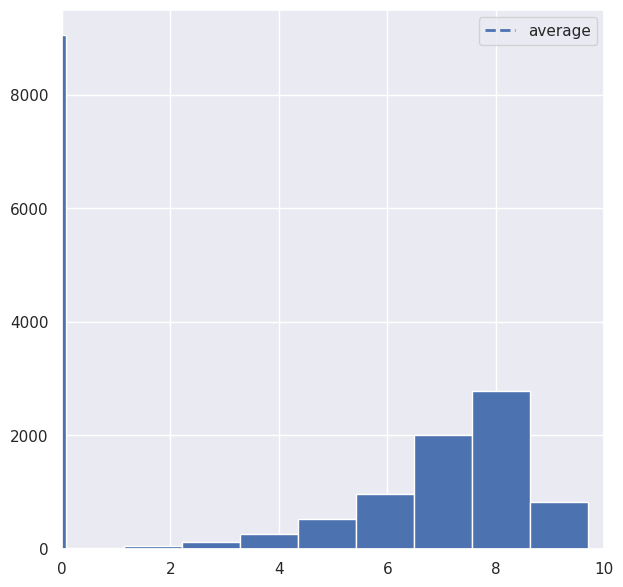

In [ ]:
fig, ax = plt.subplots()

data_for_analiz['user_score'].hist()

ax.set_xlim([0, 10])

ax.axvline(x=avg, color='b', label='average', linestyle='--', linewidth=2)

ax.legend().set_visible(True)

In [ ]:
data_for_analiz['user_score'].sort_values().unique().tolist()

[-1.0,
 0.0,
 0.2,
 0.3,
 0.5,
 0.6,
 0.7,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.1,
 6.2,
 6.3,
 6.4,
 6.5,
 6.6,
 6.7,
 6.8,
 6.9,
 7.0,
 7.1,
 7.2,
 7.3,
 7.4,
 7.5,
 7.6,
 7.7,
 7.8,
 7.9,
 8.0,
 8.1,
 8.2,
 8.3,
 8.4,
 8.5,
 8.6,
 8.7,
 8.8,
 8.9,
 9.0,
 9.1,
 9.2,
 9.3,
 9.4,
 9.5,
 9.6,
 9.7]

Максимальный рейтинг 9.7

In [ ]:
data_for_analiz.query('user_score == 9.7')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales,categorization,popular_user
14410,breath of fire iii,psp,2005,role-playing,0.00,0.02,0.00,0.01,-1.00,9.70,t,0.03,6.7-10.0,-


Ранее решено, что при -1 о рейтинге игры ничего неизвестно, а значит самая низкооцененная игра имеет рейтинг 0. Найдем ее.

In [ ]:
data_for_analiz.query('user_score == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales,categorization,popular_user
2834,my little pony: pinkie pie's party,ds,2008,adventure,0.66,0.00,0.00,0.06,-1.00,0.00,e,0.72,0.0-3.3,-


По информации об играх видно, что они обе почти не продавались и не были популярны у пользователей. Тогда стоит искать высокоцененную игру еще и по критерию популярности равному 'yes', а также учитывать мнение критиков

In [ ]:
data_filtr3 = data_for_analiz[data_for_analiz['user_score'] >= 9.4]
data_filtr3 = data_filtr3[data_filtr3['popular_user'] == 'yes']
data_filtr3 = data_filtr3[data_filtr3['critic_score'] > 9.5]
# data_filtr3 = data[data['popular_user'] == 'yes']
data_filtr3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales,categorization,popular_user
1067,resident evil 4,gc,2005,action,0.98,0.42,0.22,0.06,9.60,9.40,m,1.68,6.7-10.0,yes


Стоит проверить повлиял ли жанр или платформа на популярность этих игр

Для корректного анализа будем рассматривать только известные значения, т.е. уберем все, что равно -1

In [ ]:
data2 = data_for_analiz[data_for_analiz['user_score'] != -1]
data2.groupby(['genre']).agg({'user_score': ['mean', 'median']})


user_score       
                   mean median
genre                         
action             7.06   7.40
adventure          7.14   7.60
fighting           7.30   7.60
misc               6.82   7.10
platform           7.30   7.70
puzzle             7.17   7.50
racing             7.03   7.40
role-playing       7.62   7.80
shooter            7.04   7.40
simulation         7.13   7.50
sports             6.96   7.40
strategy           7.30   7.80

Можно сделать вывод, что жанр не влияет на оценку от пользователей, т.к. средние и<br> медианные значения у action (жанр самой высокооцененной игры) и adventure (жанр<br> самой низкооцененной игры) примерно равны.

In [ ]:
data2 = data_for_analiz[data_for_analiz['user_score'] != -1]
data2.groupby(['platform']).agg({'user_score': ['mean', 'median']})

user_score       
               mean median
platform                  
3ds            6.83   7.10
dc             8.53   8.80
ds             7.03   7.40
gba            7.69   8.00
gc             7.60   7.95
pc             7.07   7.50
ps             7.87   8.30
ps2            7.63   8.00
ps3            6.73   7.10
ps4            6.75   7.00
psp            7.23   7.50
psv            7.34   7.60
wii            6.74   7.15
wiiu           6.89   7.10
x360           6.69   7.00
xb             7.50   8.00
xone           6.51   6.80

Из таблицы выше можно сделать, что на платформе gs (платформа самой высокооцененной игры)<br> и ds (платформа самой низкооцененной игры) средние и медианные оценки примерно равны, а значит<br> платформа тоже не влияет на оценку игр.

#### 4.2 Портрет пользователя
<a id='4.2_задание'></a>
[К содержанию](#4.2)

Выведем таблицу, в которой показаны все игры на ps4

In [ ]:
portrait_platform = data.query('platform == "ps4"').sort_values('user_score', ascending=False)[['year_of_release','name', 'genre', 'rating', 'user_score', 'na_sales',	'eu_sales', 'jp_sales', 'other_sales', 'all_region_sales']]
portrait_platform

,year_of_release,name,genre,rating,user_score,na_sales,eu_sales,jp_sales,other_sales,all_region_sales
303,2015,the witcher 3: wild hunt,role-playing,m,9.20,1.02,2.13,0.23,0.59,3.97
1106,2016,dark souls iii,role-playing,m,8.80,0.65,0.45,0.34,0.22,1.66
8885,2016,the king of fighters xiv,fighting,t,8.70,0.07,0.02,0.04,0.02,0.15
5119,2016,rocket league,sports,e,8.70,0.03,0.28,0.00,0.05,0.36
4675,2016,farming simulator 17,simulation,e,8.70,0.05,0.31,0.00,0.06,0.42
...,...,...,...,...,...,...,...,...,...,...
9884,2014,akiba's trip: undead & undressed,action,nd,-1.00,0.08,0.00,0.01,0.02,0.11
10251,2015,wasteland 2,role-playing,nd,-1.00,0.08,0.00,0.02,0.02,0.12
10404,2016,fate/extella: the umbral star,action,t,-1.00,0.00,0.00,0.11,0.00,0.11
10629,2015,earth defense force 2025.1: the shadow of new ...,action,nd,-1.00,0.00,0.00,0.10,0.00,0.10


Выведем сводную таблицу с данными о том на какую сумму продано игр по жанрам во всех регионах

In [ ]:
portrait_platform.groupby('genre').agg({'all_region_sales':['sum', 'mean', 'min', 'max']})

all_region_sales                
                          sum mean  min   max
genre                                        
action                  96.10 0.67 0.01 12.62
adventure                6.34 0.23 0.01  1.66
fighting                 8.65 0.48 0.02  2.78
misc                     8.19 0.41 0.01  4.32
platform                 7.69 0.64 0.05  1.91
puzzle                   0.02 0.02 0.02  0.02
racing                  12.14 0.64 0.05  2.42
role-playing            28.99 0.57 0.01  7.17
shooter                 88.56 2.16 0.01 14.63
simulation               1.23 0.20 0.01  0.42
sports                  55.61 1.21 0.01  8.58
strategy                 0.62 0.10 0.04  0.22

Выведем таблицу, где показаны продажи игр конкретного рейтинга по всему миру

In [ ]:
portrait_platform.groupby('rating').agg({'all_region_sales':['sum', 'mean', 'min', 'max']})

all_region_sales                
                    sum mean  min   max
rating                                 
e                 53.57 0.99 0.02  8.58
e10+              21.98 0.55 0.01  3.87
m                125.91 1.66 0.01 12.62
nd                68.20 0.50 0.01 14.63
t                 44.48 0.52 0.01  5.64

Посчитаем продажи по годам в Северной Америке:

In [ ]:
portrait_platform.groupby('year_of_release').agg({'na_sales':['sum', 'mean', 'min', 'max']})

na_sales               
                     sum mean  min  max
year_of_release                        
2013               10.13 0.63 0.06 1.78
2014               34.75 0.46 0.00 3.96
2015               42.37 0.31 0.00 6.03
2016               21.49 0.13 0.00 1.85

Посчитаем продажи по годам в Европе:

In [ ]:
portrait_platform.groupby('year_of_release').agg({'eu_sales':['sum', 'mean', 'min', 'max']})

eu_sales               
                     sum mean  min  max
year_of_release                        
2013               11.05 0.69 0.05 1.85
2014               46.50 0.62 0.00 6.31
2015               51.76 0.38 0.00 6.12
2016               31.78 0.19 0.00 5.75

Посчитаем продажи по годам в Японии:

In [ ]:
portrait_platform.groupby('year_of_release').agg({'jp_sales':['sum', 'mean', 'min', 'max']})

jp_sales               
                     sum mean  min  max
year_of_release                        
2013                0.94 0.06 0.00 0.42
2014                2.97 0.04 0.00 0.38
2015                6.31 0.05 0.00 0.49
2016                5.74 0.04 0.00 0.37

Посчитаем продажи по годам в других регионах:

In [ ]:
portrait_platform.groupby('year_of_release').agg({'other_sales':['sum', 'mean', 'min', 'max']})

other_sales               
                        sum mean  min  max
year_of_release                           
2013                   3.87 0.24 0.03 0.57
2014                  15.78 0.21 0.00 1.97
2015                  18.46 0.13 0.00 2.38
2016                  10.24 0.06 0.00 1.11

Посчитаем продажи по годам во всех регионах:

In [ ]:
portrait_platform.groupby('year_of_release').agg({'all_region_sales':['sum', 'mean', 'min', 'max']})

all_region_sales                
                             sum mean  min   max
year_of_release                                 
2013                       25.99 1.62 0.16  3.83
2014                      100.00 1.33 0.01 12.62
2015                      118.90 0.87 0.01 14.63
2016                       69.25 0.42 0.01  7.60

Можно сделать вывод, что пользователем ps4 чаще всего оказывается платежеспособный человек, старше 17 лет (т.к. большинство проданных игр рейтинга m), из Северной Америки или Европы, любящий игры жанров role-playing, action, shooter, sports, не любящий puzzle, simulation, strategy. Максимальные продажи состоялись в 2014 и 2015 годах.

#### 4.3 Построение и обучение простейшей модели для задачи регрессии
<a id='4.3_задание'></a>
[К содержанию](#4.3)

In [ ]:
#Глобальная переменная
RANDOM_STATE = 12345

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16619 entries, 0 to 16618
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16619 non-null  object 
 1   platform          16619 non-null  object 
 2   year_of_release   16619 non-null  int64  
 3   genre             16619 non-null  object 
 4   na_sales          16619 non-null  float64
 5   eu_sales          16619 non-null  float64
 6   jp_sales          16619 non-null  float64
 7   other_sales       16619 non-null  float64
 8   critic_score      16619 non-null  float64
 9   user_score        16619 non-null  float64
 10  rating            16619 non-null  object 
 11  all_region_sales  16619 non-null  float64
 12  categorization    16619 non-null  object 
 13  popular_user      16619 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 1.8+ MB


In [ ]:
features = data[['year_of_release', 'eu_sales', 'jp_sales', 'other_sales', 'user_score', 'critic_score']]

In [ ]:
# целевую переменную поместим в переменную target

target = data['na_sales']

In [ ]:
print(type(features), type(target))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
# разобьем данные на обучающую и тестовую выборку
# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости

features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    test_size = 0.3,
    random_state=RANDOM_STATE)

In [ ]:
# посмотрим на новую размерность обучающей выборки

print(f'Признаки обучающей выборки: {features_train.shape}')
print(f'Целевой признак обучающей выборки: {target_train.shape}')

Признаки обучающей выборки: (11633, 6)
Целевой признак обучающей выборки: (11633,)


In [ ]:
# и тестовой выборки

print(f'Признаки тестовой выборки: {features_test.shape}')
print(f'Целевой признак тестовой выборки: {target_test.shape}')

Признаки тестовой выборки: (4986, 6)
Целевой признак тестовой выборки: (4986,)


In [ ]:
# создадим объект этого класса и запишем в переменную model
%%time

model = LinearRegression()

CPU times: user 15 µs, sys: 2 µs, total: 17 µs
Wall time: 22.4 µs


In [ ]:
# обучим модель линейной регрессии
%%time

model.fit(features_train, target_train)

CPU times: user 12.1 ms, sys: 5.02 ms, total: 17.1 ms
Wall time: 47.6 ms


LinearRegression()

In [ ]:
# на основе нескольких независимых переменных (feature) предскажем пользовательскую оценку (target)

target_pred = model.predict(features_test)

In [ ]:
# выведем первые пять значений с помощью диапазона индексов

print(target_pred[:5])

[0.10056204 0.35021101 0.05748752 0.728768   0.08872054]


In [ ]:
target_test

11210   0.06
608     2.21
5248    0.33
655     0.77
10051   0.06
        ... 
1003    1.68
8223    0.16
2899    0.00
3679    0.36
12911   0.03
Name: na_sales, Length: 4986, dtype: float64

In [ ]:
coefficients = pd.DataFrame({'features': features.columns, 'coefficients': model.coef_})
print(coefficients)

          features  coefficients
0  year_of_release         -0.00
1         eu_sales          0.96
2         jp_sales          0.35
3      other_sales          0.72
4       user_score          0.00
5     critic_score          0.00


In [ ]:
# выведем корень среднеквадратической ошибки
# сравним тестовые и прогнозные значения оценок пользователей

print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(target_test, target_pred)))

Root Mean Squared Error (RMSE): 0.4866967396460985


In [ ]:
# рассчитаем коэффициент детерминации **R2**

print('R2:', np.round(metrics.r2_score(target_test, target_pred), 2))

R2: 0.57


In [ ]:
# Предсказание для God of War: Ragnarök
# Взяты примерные данные по состоянию на февраль 2023
new_game = pd.DataFrame({'year_of_release': [2022], 'eu_sales': [17], 'jp_sales': [6], 'other_sales': [5], 'user_score': [8.3], 'critic_score': [9]})
prediction = model.predict(new_game)

print(f"Predicted NA_Sales: {prediction[0]}")

Predicted NA_Sales: 22.042501811073837


**Вывод**<br>
- God of War: Ragnarök, предсказанные продажи в Северной Америке 22.04 млн долларов
- R2 = 0.57, это значит, что только 57% результатов от модели совпадут с действительностью и модель нельзя назвать надежной

***

# 5. Общий вывод по проекту
<a id='общий_вывод_задание'></a>
[К содержанию](#общий_вывод)

В рамках учебного проекта «Выявление закономерностей, определяющих успешность компьютерных игр» был проанализирован датасет, содержащий информацию о годах выпуска, платформах, оценках игроков и критиков, а также продажах игр в разных странах.<br>

В ходе предварительного изучения и предобработки данных:
- были переименованы столбцы в соответствии со "змеиным" стилем;
- была проведена проверка на редкие и выбивающиеся значения;
- были проверены и по необходимости изменены типы данных;
- изучены и заполнены либо удалены пропуски;
- изучены дубликаты;
- были проверены количественные значения;
- были добавлены новые столбцы.

Был проведен **исследовательский анализ** и **графический анализ** и получены следующие выводы:
- в 2008, 2009 г. индустрия видеоигр выпускала наибольшее количество игр;
- платформы dc, gba, gc, ps, ps2, xb чаще других удостаиваются высоких оценок от пользователей;
- получены средние и медианные суммы сборов для каждого года;
- с помощью сводной таблицы рассчитано сколько игр было выпущено на каждой платформе;
- с помощью логической индексации возможно получить списки игр, по заданным критериям. Например, игры жанра action, рейтинга Е, с крайне низкими оценками от игроков;
- обучена простейшая модель для задач регрессии.

В **статистическом анализе** выводы следующие:
- По межквартильному разбросу не были обнаружены выбросы из столбцов 'critic_score' и 'user_score';
- В столбце 'year_of_release' нет выбросов, значения равные нулю означают отсутсвие данных о годе;
- В столбцах 'na_sales', 'eu_sales', 'jp_sales', 'other_sales' есть большое количество выбросов;
- В столбцах 'critic_score', 'user_score' нет левой границы и выбросов;
- В столбце 'all_region_sales' есть большое количество выбросов.

In [ ]:
# data.to_csv(r'practise_11_12.csv', index=False)